In [269]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import math
import pprint
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error

In [270]:
data = pd.read_csv('DIS_sent_news')

In [271]:
data['date']= data['publication_date']
#data['date']= pd.to_datetime(data.publication_date,format='%Y-%m-%d')
#data =data.set_index['date']
#data = date.drop(['publication_date'], axis=1)

In [272]:
data['date']= pd.to_datetime(data.publication_date,format='%Y-%m-%d')

In [273]:
data = data.set_index('date')

In [274]:
data = data.drop(['publication_date'], axis=1)

In [275]:
data[:100]

,compound,headline,neg,neu,pos,label
date,,,,,,
2015-05-12 05:05:04,-0.1027,Insight - U.S. media CEOs are top paid even in...,0.138,0.750,0.113,-1
2015-08-04 22:46:43,-0.1027,Disney shares drop after company lowers cable ...,0.333,0.463,0.204,-1
2015-09-08 22:58:07,0.1027,Infosys says cleared in U.S. visa probe by Lab...,0.000,0.865,0.135,1
2015-09-09 02:39:40,0.1027,Infosys says cleared in U.S. visa probe by Lab...,0.000,0.865,0.135,1
2015-10-21 16:03:16,0.0000,Disney's ESPN to eliminate over 300 positions ...,0.000,1.000,0.000,0
2015-12-22 23:43:52,0.0000,Disney in talks with Univision to exit Fusion ...,0.000,1.000,0.000,0
2016-03-09 02:55:50,-0.3182,Disney announces $75 mn loss on 'The Finest Ho...,0.223,0.777,0.000,-1
2016-04-04 21:19:03,-0.3182,Disney CEO frontrunner Thomas Staggs resigns,0.315,0.685,0.000,-1
2016-04-24 19:08:08,0.0000,'The Jungle Book' bests 'Huntsman' at the US b...,0.000,1.000,0.000,0


In [276]:
news_daily = data.resample('D').mean()

In [277]:
# Resample the full dataframe to monthly timeframe
#news_daily = data.resample('D').mean()



In [278]:
news_daily.fillna(0, inplace=True)
news_daily.head()

,compound,neg,neu,pos,label
date,,,,,
2015-05-12,-0.1027,0.138,0.75,0.113,-1.0
2015-05-13,0.0000,0.000,0.00,0.000,0.0
2015-05-14,0.0000,0.000,0.00,0.000,0.0
2015-05-15,0.0000,0.000,0.00,0.000,0.0
2015-05-16,0.0000,0.000,0.00,0.000,0.0


In [279]:
news_daily=news_daily.loc['2016-07-01':'2019-07-01']
news_daily.head()

,compound,neg,neu,pos,label
date,,,,,
2016-07-01,0.000,0.0,0.0000,0.0000,0.0
2016-07-02,0.000,0.0,0.0000,0.0000,0.0
2016-07-03,0.000,0.0,0.0000,0.0000,0.0
2016-07-04,0.000,0.0,0.0000,0.0000,0.0
2016-07-05,0.148,0.0,0.9695,0.0305,0.5


In [280]:
news_daily.describe()

,compound,neg,neu,pos,label
count,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,0.197444,0.042879,0.828365,0.092257,0.329191
std,0.199917,0.039503,0.169885,0.046991,0.335992
min,-0.872800,0.000000,0.000000,0.000000,-1.000000
25%,0.078718,0.021500,0.833905,0.069863,0.125000
50%,0.201264,0.037139,0.863045,0.090591,0.333333
75%,0.315600,0.055654,0.888372,0.112558,0.530392
max,0.974900,0.507000,1.000000,0.426000,1.000000


### Fundamental Data

In [281]:
fund = pd.read_csv('DIS_Fund.csv')
fund.tail()

,date,marketcap,pricetobook,pricetoearnings,dividendyield,earningsyield,Quarter,nopat,freecashflow,roe,...,ebitda,totalassets,totalliabilities,debt,netincome,netcashfromoperatingactivities,netcashfrominvestingactivities,netcashfromfinancingactivities,longterminvestments,one_yr_monthly_beta
1080,06/04/2015,1.700000e+11,3.6894,21.1415,0.020295,0.047300,Q2-2015,8065375790,6107375790,0.174908,...,14458000000,8.571500e+10,3.597800e+10,14957000000,8516000000,10814000000,-4161000000,-6617000000,2575000000,1.567
1081,02/04/2015,1.700000e+11,3.7023,21.2156,0.020224,0.047135,Q2-2015,8065375790,6107375790,0.174908,...,14458000000,8.571500e+10,3.597800e+10,14957000000,8516000000,10814000000,-4161000000,-6617000000,2575000000,1.567
1082,01/04/2015,1.700000e+11,3.6827,21.1035,0.020332,0.047386,Q2-2015,8065375790,6107375790,0.174908,...,14458000000,8.571500e+10,3.597800e+10,14957000000,8516000000,10814000000,-4161000000,-6617000000,2575000000,1.567
1083,31/03/2015,1.690000e+11,3.6635,20.9934,0.020438,0.047634,Q2-2015,8065375790,6107375790,0.174908,...,14458000000,8.571500e+10,3.597800e+10,14957000000,8516000000,10814000000,-4161000000,-6617000000,2575000000,1.567
1084,30/03/2015,1.710000e+11,3.7065,21.2396,0.020201,0.047082,Q2-2015,8065375790,6107375790,0.174908,...,14458000000,8.571500e+10,3.597800e+10,14957000000,8516000000,10814000000,-4161000000,-6617000000,2575000000,1.567


In [282]:
fund['date']= pd.to_datetime(fund.date,format='%d/%m/%Y')

In [283]:

fund.index =fund['date']

In [284]:
fund=fund.loc['2019-07-01':'2016-07-01']

In [285]:
fund.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2019-07-01 to 2016-07-01
Data columns (total 36 columns):
date                              754 non-null datetime64[ns]
marketcap                         754 non-null float64
pricetobook                       754 non-null float64
pricetoearnings                   754 non-null float64
dividendyield                     754 non-null float64
earningsyield                     754 non-null float64
Quarter                           754 non-null object
nopat                             754 non-null int64
freecashflow                      754 non-null int64
roe                               754 non-null float64
ebitdagrowth                      754 non-null float64
ebitdamargin                      754 non-null float64
cashdividendspershare             754 non-null float64
bookvaluepershare                 754 non-null float64
capex                             754 non-null int64
currentratio                      754 non-null floa

### Price analysis

In [286]:
df_price = pd.read_csv('disney_prices')

In [287]:
df_price['date']= df_price['date']
df_price['date']=pd.to_datetime(df_price.date,format='%Y-%m-%d')
df_price.index =df_price['date']

In [288]:
#df_price = df_price.drop(['date'], axis=1)

In [289]:
df_price.head()

,Unnamed: 0,adj_close,adj_high,adj_low,adj_open,adj_volume,close,date,frequency,high,intraperiod,low,open,volume
date,,,,,,,,,,,,,,
2019-07-22,0,140.84,141.44,140.01,141.25,7339992.0,140.84,2019-07-22,daily,141.44,False,140.01,141.25,7707699.0
2019-07-19,1,139.85,142.24,139.74,142.24,6109874.0,139.85,2019-07-19,daily,142.24,False,139.74,142.24,6109874.0
2019-07-18,2,141.63,142.46,140.17,142.46,8035481.0,141.63,2019-07-18,daily,142.46,False,140.17,142.46,8035481.0
2019-07-17,3,142.57,144.68,142.37,144.60,5296353.0,142.57,2019-07-17,daily,144.68,False,142.37,144.60,5296353.0
2019-07-16,4,144.30,144.99,143.81,144.75,5854707.0,144.30,2019-07-16,daily,144.99,False,143.81,144.75,5854707.0


In [290]:
df_price=df_price[::-1]

In [291]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1200 entries, 2014-10-14 to 2019-07-22
Data columns (total 14 columns):
Unnamed: 0     1200 non-null int64
adj_close      1200 non-null float64
adj_high       1200 non-null float64
adj_low        1200 non-null float64
adj_open       1200 non-null float64
adj_volume     1200 non-null float64
close          1200 non-null float64
date           1200 non-null datetime64[ns]
frequency      1200 non-null object
high           1200 non-null float64
intraperiod    1200 non-null bool
low            1200 non-null float64
open           1200 non-null float64
volume         1200 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(10), int64(1), object(1)
memory usage: 132.4+ KB


In [292]:
import talib
for n in [14, 30, 50, 200]:

    # Create the moving average indicator and divide by Adj_Close
    df_price['ma' + str(n)] = df_price.adj_close.rolling(window=n).mean()
    
    # Create the RSI indicator
    df_price['rsi' + str(n)] = talib.RSI(df_price['adj_close'].values, timeperiod=n)

In [293]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1200 entries, 2014-10-14 to 2019-07-22
Data columns (total 22 columns):
Unnamed: 0     1200 non-null int64
adj_close      1200 non-null float64
adj_high       1200 non-null float64
adj_low        1200 non-null float64
adj_open       1200 non-null float64
adj_volume     1200 non-null float64
close          1200 non-null float64
date           1200 non-null datetime64[ns]
frequency      1200 non-null object
high           1200 non-null float64
intraperiod    1200 non-null bool
low            1200 non-null float64
open           1200 non-null float64
volume         1200 non-null float64
ma14           1187 non-null float64
rsi14          1186 non-null float64
ma30           1171 non-null float64
rsi30          1170 non-null float64
ma50           1151 non-null float64
rsi50          1150 non-null float64
ma200          1001 non-null float64
rsi200         1000 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(18), int64(1), o

In [294]:
df_price[:100]

,Unnamed: 0,adj_close,adj_high,adj_low,adj_open,adj_volume,close,date,frequency,high,...,open,volume,ma14,rsi14,ma30,rsi30,ma50,rsi50,ma200,rsi200
date,,,,,,,,,,,,,,,,,,,,,
2014-10-14,1199,77.899344,79.176990,77.677145,78.464101,8607117.0,84.14,2014-10-14,daily,85.5200,...,84.75,8607117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-10-15,1198,75.992134,77.547529,72.714696,76.279142,21844427.0,82.08,2014-10-15,daily,83.7600,...,82.39,21844427.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-10-16,1197,75.677352,76.353208,73.649784,74.001600,13216697.0,81.74,2014-10-16,daily,82.4700,...,79.93,13216697.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-10-17,1196,77.612337,78.380776,76.547632,76.547632,12386547.0,83.83,2014-10-17,daily,84.6600,...,82.68,12386547.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-10-20,1195,79.176990,79.260314,77.903973,77.982669,8306147.0,85.52,2014-10-20,daily,85.6100,...,84.23,8306147.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-10-21,1194,81.047167,81.176783,79.852846,79.917654,9170356.0,87.54,2014-10-21,daily,87.6800,...,86.32,9170356.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-10-22,1193,80.639801,82.037805,80.528702,81.417499,9314515.0,87.10,2014-10-22,daily,88.6100,...,87.94,9314515.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-10-23,1192,81.463790,82.056321,81.250849,81.667473,7245328.0,87.99,2014-10-23,daily,88.6300,...,88.21,7245328.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-10-24,1191,81.463790,82.056321,81.250849,81.667473,7245328.0,87.99,2014-10-24,daily,88.6300,...,88.21,7245328.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [295]:
df_price=df_price.loc['2016-07-01':'2019-07-01']

In [296]:
df_price.ma200

date
2016-07-01     97.255326
2016-07-05     97.227440
2016-07-06     97.209715
2016-07-07     97.192506
2016-07-08     97.185419
2016-07-11     97.184390
2016-07-12     97.188892
2016-07-13     97.193374
2016-07-14     97.206820
2016-07-15     97.215069
2016-07-18     97.211882
2016-07-19     97.203229
2016-07-20     97.187044
2016-07-21     97.165848
2016-07-22     97.143596
2016-07-25     97.121605
2016-07-26     97.090516
2016-07-27     97.053226
2016-07-28     97.010204
2016-07-29     96.966242
2016-08-01     96.924375
2016-08-02     96.869789
2016-08-03     96.818716
2016-08-04     96.757397
2016-08-05     96.697536
2016-08-08     96.636115
2016-08-09     96.564190
2016-08-10     96.498708
2016-08-11     96.430768
2016-08-12     96.357205
                 ...    
2019-05-20    114.425690
2019-05-21    114.536046
2019-05-22    114.638602
2019-05-23    114.726470
2019-05-24    114.811578
2019-05-28    114.908564
2019-05-29    114.999445
2019-05-30    115.100754
2019-05-31    115.20

In [297]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2016-07-01 to 2019-07-01
Data columns (total 22 columns):
Unnamed: 0     754 non-null int64
adj_close      754 non-null float64
adj_high       754 non-null float64
adj_low        754 non-null float64
adj_open       754 non-null float64
adj_volume     754 non-null float64
close          754 non-null float64
date           754 non-null datetime64[ns]
frequency      754 non-null object
high           754 non-null float64
intraperiod    754 non-null bool
low            754 non-null float64
open           754 non-null float64
volume         754 non-null float64
ma14           754 non-null float64
rsi14          754 non-null float64
ma30           754 non-null float64
rsi30          754 non-null float64
ma50           754 non-null float64
rsi50          754 non-null float64
ma200          754 non-null float64
rsi200         754 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(18), int64(1), object(1)
memory usage: 

In [298]:
#df.join(other, lsuffix='_caller', rsuffix='_other')
df_price = df_price.join(news_daily['compound'])
#full_df = pd.merge(df_price,news_daily['compound'],how='left')

In [299]:
df_price=pd.merge(df_price,fund,how='outer',on='date')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: FutureWarning: 'date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


In [300]:
df_price.index =df_price['date']

In [301]:
df_price.head()

,Unnamed: 0,adj_close,adj_high,adj_low,adj_open,adj_volume,close,date,frequency,high,...,ebitda,totalassets,totalliabilities,debt,netincome,netcashfromoperatingactivities,netcashfrominvestingactivities,netcashfromfinancingactivities,longterminvestments,one_yr_monthly_beta
date,,,,,,,,,,,,,,,,,,,,,
2016-07-01,767,93.039847,93.618795,92.736136,92.774100,5681627.0,98.03,2016-07-01,daily,98.64,...,16908000000,9.091400e+10,4.276800e+10,20441000000,9639000000,13419000000,-5416000000,-6880000000,3228000000,1.4814
2016-07-05,766,92.688681,93.011374,92.218879,92.793082,5846412.0,97.66,2016-07-05,daily,98.00,...,16908000000,9.091400e+10,4.276800e+10,20441000000,9639000000,13419000000,-5416000000,-6880000000,3228000000,1.4814
2016-07-06,765,93.438467,93.504904,91.834495,92.062278,6223292.0,98.45,2016-07-06,daily,98.52,...,16908000000,9.091400e+10,4.276800e+10,20441000000,9639000000,13419000000,-5416000000,-6880000000,3228000000,1.4814
2016-07-07,764,94.078980,94.145900,93.285509,93.333308,5146032.0,98.41,2016-07-07,daily,98.48,...,16908000000,9.091400e+10,4.276800e+10,20441000000,9639000000,13419000000,-5416000000,-6880000000,3228000000,1.4814
2016-07-08,763,95.235728,95.455606,94.423137,94.882012,6045805.0,99.62,2016-07-08,daily,99.85,...,16908000000,9.091400e+10,4.276800e+10,20441000000,9639000000,13419000000,-5416000000,-6880000000,3228000000,1.4814


In [302]:
df_price['Unnamed: 0'].drop

<bound method Series.drop of date
2016-07-01    767
2016-07-05    766
2016-07-06    765
2016-07-07    764
2016-07-08    763
2016-07-11    762
2016-07-12    761
2016-07-13    760
2016-07-14    759
2016-07-15    758
2016-07-18    757
2016-07-19    756
2016-07-20    755
2016-07-21    754
2016-07-22    753
2016-07-25    752
2016-07-26    751
2016-07-27    750
2016-07-28    749
2016-07-29    748
2016-08-01    747
2016-08-02    746
2016-08-03    745
2016-08-04    744
2016-08-05    743
2016-08-08    742
2016-08-09    741
2016-08-10    740
2016-08-11    739
2016-08-12    738
             ... 
2019-05-20     43
2019-05-21     42
2019-05-22     41
2019-05-23     40
2019-05-24     39
2019-05-28     38
2019-05-29     37
2019-05-30     36
2019-05-31     35
2019-06-03     34
2019-06-04     33
2019-06-05     32
2019-06-06     31
2019-06-07     30
2019-06-10     29
2019-06-11     28
2019-06-12     27
2019-06-13     26
2019-06-14     25
2019-06-17     24
2019-06-18     23
2019-06-19     22
2019-06-20  

In [303]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2016-07-01 to 2019-07-01
Data columns (total 58 columns):
Unnamed: 0                        754 non-null int64
adj_close                         754 non-null float64
adj_high                          754 non-null float64
adj_low                           754 non-null float64
adj_open                          754 non-null float64
adj_volume                        754 non-null float64
close                             754 non-null float64
date                              754 non-null datetime64[ns]
frequency                         754 non-null object
high                              754 non-null float64
intraperiod                       754 non-null bool
low                               754 non-null float64
open                              754 non-null float64
volume                            754 non-null float64
ma14                              754 non-null float64
rsi14                             754 non-null flo

In [304]:
df_price['ebitda'] = df_price['ebitda'].astype(float)

In [305]:
df_price.columns

Index(['Unnamed: 0', 'adj_close', 'adj_high', 'adj_low', 'adj_open',
       'adj_volume', 'close', 'date', 'frequency', 'high', 'intraperiod',
       'low', 'open', 'volume', 'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50',
       'rsi50', 'ma200', 'rsi200', 'compound', 'marketcap', 'pricetobook',
       'pricetoearnings', 'dividendyield', 'earningsyield', 'Quarter', 'nopat',
       'freecashflow', 'roe', 'ebitdagrowth', 'ebitdamargin',
       'cashdividendspershare', 'bookvaluepershare', 'capex', 'currentratio',
       'debttoequity', 'epsgrowth', 'investedcapitalgrowth', 'fcffgrowth',
       'finleverage', 'netincomegrowth', 'roa', 'revenuegrowth', 'basiceps',
       'operatingrevenue', 'ebitda', 'totalassets', 'totalliabilities', 'debt',
       'netincome', 'netcashfromoperatingactivities',
       'netcashfrominvestingactivities', 'netcashfromfinancingactivities',
       'longterminvestments', 'one_yr_monthly_beta'],
      dtype='object')

In [306]:
fundamentals=['marketcap', 'pricetobook','pricetoearnings', 'dividendyield', 'earningsyield', 'nopat','freecashflow', 'roe', 'ebitdagrowth', 'ebitdamargin',
       'cashdividendspershare', 'bookvaluepershare', 'capex', 'currentratio',
       'debttoequity', 'epsgrowth', 'investedcapitalgrowth', 'fcffgrowth',
       'finleverage', 'netincomegrowth', 'roa', 'revenuegrowth', 'basiceps',
       'operatingrevenue', 'ebitda', 'totalassets', 'totalliabilities', 'debt',
       'netincome', 'netcashfromoperatingactivities',
       'netcashfrominvestingactivities', 'netcashfromfinancingactivities',
       'longterminvestments','one_yr_monthly_beta']

In [307]:
for column in fundamentals:
    df_price[column] = df_price[column].astype(float)

In [308]:
df_price.head()

,Unnamed: 0,adj_close,adj_high,adj_low,adj_open,adj_volume,close,date,frequency,high,...,ebitda,totalassets,totalliabilities,debt,netincome,netcashfromoperatingactivities,netcashfrominvestingactivities,netcashfromfinancingactivities,longterminvestments,one_yr_monthly_beta
date,,,,,,,,,,,,,,,,,,,,,
2016-07-01,767,93.039847,93.618795,92.736136,92.774100,5681627.0,98.03,2016-07-01,daily,98.64,...,1.690800e+10,9.091400e+10,4.276800e+10,2.044100e+10,9.639000e+09,1.341900e+10,-5.416000e+09,-6.880000e+09,3.228000e+09,1.4814
2016-07-05,766,92.688681,93.011374,92.218879,92.793082,5846412.0,97.66,2016-07-05,daily,98.00,...,1.690800e+10,9.091400e+10,4.276800e+10,2.044100e+10,9.639000e+09,1.341900e+10,-5.416000e+09,-6.880000e+09,3.228000e+09,1.4814
2016-07-06,765,93.438467,93.504904,91.834495,92.062278,6223292.0,98.45,2016-07-06,daily,98.52,...,1.690800e+10,9.091400e+10,4.276800e+10,2.044100e+10,9.639000e+09,1.341900e+10,-5.416000e+09,-6.880000e+09,3.228000e+09,1.4814
2016-07-07,764,94.078980,94.145900,93.285509,93.333308,5146032.0,98.41,2016-07-07,daily,98.48,...,1.690800e+10,9.091400e+10,4.276800e+10,2.044100e+10,9.639000e+09,1.341900e+10,-5.416000e+09,-6.880000e+09,3.228000e+09,1.4814
2016-07-08,763,95.235728,95.455606,94.423137,94.882012,6045805.0,99.62,2016-07-08,daily,99.85,...,1.690800e+10,9.091400e+10,4.276800e+10,2.044100e+10,9.639000e+09,1.341900e+10,-5.416000e+09,-6.880000e+09,3.228000e+09,1.4814


### EDA

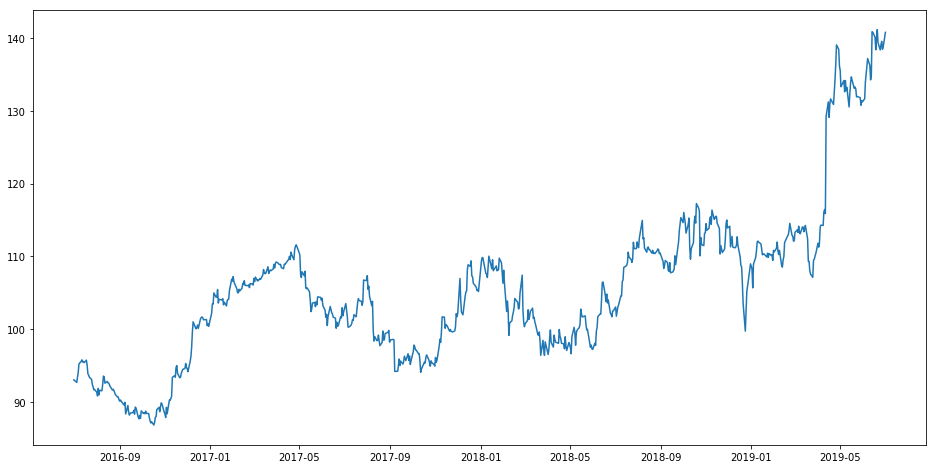

In [309]:
#plot
plt.figure(figsize=(16,8))
plt.plot(df_price['adj_close'], label='Close Price history')

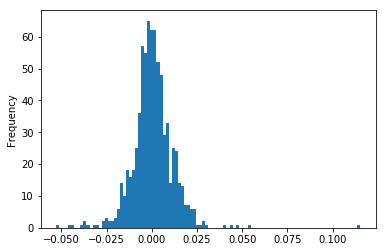

In [310]:
df_price['adj_close'].pct_change().plot.hist(bins=100)

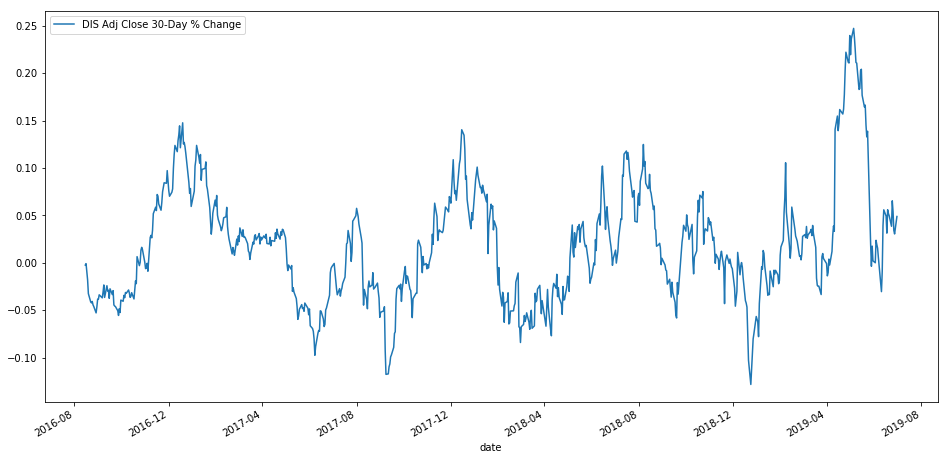

In [311]:
plt.figure(figsize=(16,8))
df_price['adj_close'].pct_change(30).plot(label='DIS Adj Close 30-Day % Change',legend=True)

                     5d_close_pct  5d_close_future_pct
5d_close_pct             1.000000            -0.038565
5d_close_future_pct     -0.038565             1.000000


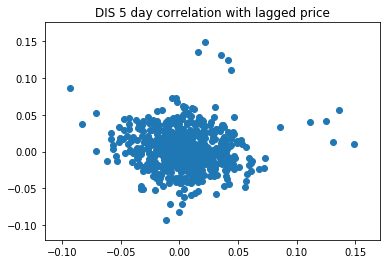

In [312]:
# Create 5-day % changes of Adj_Close for the current day, and 5 days in the future
df_price['5d_future_close'] = df_price['adj_close'].shift(-5)
df_price['5d_close_future_pct'] = df_price['5d_future_close'].pct_change(5)
df_price['5d_close_pct'] = df_price['adj_close'].pct_change(5)

# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df_price[['5d_close_pct', '5d_close_future_pct']].corr()
print(corr)

# Scatter the current 5-day percent change vs the future 5-day percent change
plt.title('DIS 5 day correlation with lagged price')
plt.scatter(df_price['5d_close_pct'], df_price['5d_close_future_pct'])
plt.show()

                     compound  5d_close_future_pct
compound             1.000000             0.020938
5d_close_future_pct  0.020938             1.000000


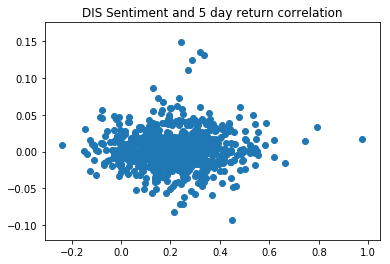

In [313]:
# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df_price[['compound', '5d_close_future_pct']].corr()
print(corr)

# Scatter the current 5-day percent change vs the future 5-day percent change
plt.title('DIS Sentiment and 5 day return correlation')
plt.scatter(df_price['compound'], df_price['5d_close_future_pct'])
plt.show()

                     1d_close_pct  1d_close_future_pct
1d_close_pct             1.000000            -0.030218
1d_close_future_pct     -0.030218             1.000000


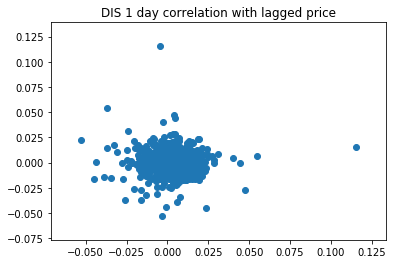

In [314]:
df_1 = df_price
# Create 5-day % changes of Adj_Close for the current day, and 5 days in the future
df_1['1d_future_close'] = df_1['adj_close'].shift(-1)
df_1['1d_close_future_pct'] = df_1['1d_future_close'].pct_change(1)
df_1['1d_close_pct'] = df_1['adj_close'].pct_change(1)

# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df_1[['1d_close_pct', '1d_close_future_pct']].corr()
print(corr)
# Scatter the current 5-day percent change vs the future 5-day percent change
plt.title('DIS 1 day correlation with lagged price')
plt.scatter(df_1['1d_close_pct'], df_1['1d_close_future_pct'])
plt.show()

                     compound  1d_close_future_pct
compound             1.000000             0.010518
1d_close_future_pct  0.010518             1.000000


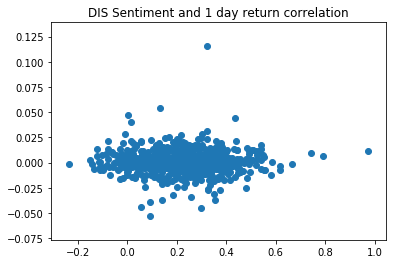

In [315]:
# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df_1[['compound', '1d_close_future_pct']].corr()
print(corr)

# Scatter the current 5-day percent change vs the future 5-day percent change
plt.title('DIS Sentiment and 1 day return correlation')
plt.scatter(df_1['compound'], df_1['1d_close_future_pct'])
plt.show()

                      30d_close_pct  30d_close_future_pct
30d_close_pct              1.000000              0.054134
30d_close_future_pct       0.054134              1.000000


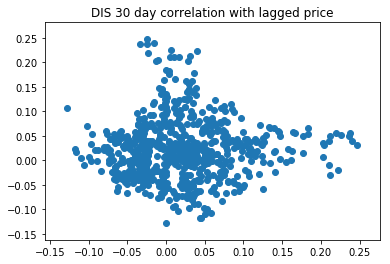

In [316]:
# Create 5-day % changes of Adj_Close for the current day, and 5 days in the future
df_30 = df_price
df_30['30d_future_close'] = df_price['adj_close'].shift(-30)
df_30['30d_close_future_pct'] = df_price['30d_future_close'].pct_change(30)
df_30['30d_close_pct'] = df_price['adj_close'].pct_change(30)

# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df_30[['30d_close_pct', '30d_close_future_pct']].corr()
print(corr)
# Scatter the current 30-day percent change vs the future 5-day percent change
plt.title('DIS 30 day correlation with lagged price')
plt.scatter(df_30['30d_close_pct'], df_30['30d_close_future_pct'])
plt.show()

                      compound  30d_close_future_pct
compound              1.000000             -0.040361
30d_close_future_pct -0.040361              1.000000


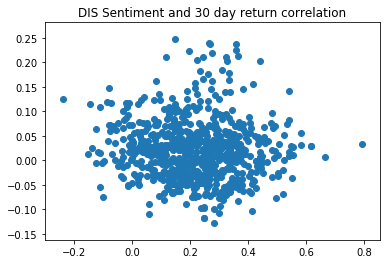

In [317]:
# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df_30[['compound', '30d_close_future_pct']].corr()
print(corr)

# Scatter the current 5-day percent change vs the future 5-day percent change
plt.title('DIS Sentiment and 30 day return correlation')
plt.scatter(df_30['compound'], df_30['30d_close_future_pct'])
plt.show()

In [318]:
df_price = df_price.drop(['Unnamed: 0'], axis =1)

In [319]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2016-07-01 to 2019-07-01
Data columns (total 66 columns):
adj_close                         754 non-null float64
adj_high                          754 non-null float64
adj_low                           754 non-null float64
adj_open                          754 non-null float64
adj_volume                        754 non-null float64
close                             754 non-null float64
date                              754 non-null datetime64[ns]
frequency                         754 non-null object
high                              754 non-null float64
intraperiod                       754 non-null bool
low                               754 non-null float64
open                              754 non-null float64
volume                            754 non-null float64
ma14                              754 non-null float64
rsi14                             754 non-null float64
ma30                              754 non-null f

In [166]:
#df_price['MACD'] = pd.Series(talib.MACD(df_price['adj_close'], fastperiod=12, slowperiod=26, signalperiod=9))
#df_price['STOCH'] = pd.Series(talib.STOCH(df_price['adj_high'].values,df_price['adj_low'].values,df_price['adj_close'].values,fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0))

In [167]:
#df_price[:50]

#df_price.drop(['MACD','STOCH'], axis =1)

In [168]:
feature_names = ['30d_close_pct']  # a list of the feature names for later

# Create moving averages and rsi for timeperiods of 14, 30, 50, and 200
for n in [14, 30, 50, 200]:
    
# Add rsi and moving average to the feature name list
    feature_names = feature_names + ['ma' + str(n), 'rsi' + str(n)]

    

        

feature_names = feature_names + ['compound'] + fundamentals
print(feature_names)



['30d_close_pct', 'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50', 'rsi50', 'ma200', 'rsi200', 'compound', 'marketcap', 'pricetobook', 'pricetoearnings', 'dividendyield', 'earningsyield', 'nopat', 'freecashflow', 'roe', 'ebitdagrowth', 'ebitdamargin', 'cashdividendspershare', 'bookvaluepershare', 'capex', 'currentratio', 'debttoequity', 'epsgrowth', 'investedcapitalgrowth', 'fcffgrowth', 'finleverage', 'netincomegrowth', 'roa', 'revenuegrowth', 'basiceps', 'operatingrevenue', 'ebitda', 'totalassets', 'totalliabilities', 'debt', 'netincome', 'netcashfromoperatingactivities', 'netcashfrominvestingactivities', 'netcashfromfinancingactivities', 'longterminvestments', 'one_yr_monthly_beta']


In [169]:
# Create 2 new volume features, 1-day % change and 5-day SMA of the % change
new_features = ['Adj_Volume_1d_change', 'Adj_Volume_1d_change_SMA']
feature_names.extend(new_features)
df_price['Adj_Volume_1d_change'] = df_price['adj_volume'].pct_change()
df_price['Adj_Volume_1d_change_SMA'] = talib.SMA(df_price['Adj_Volume_1d_change'].values,
                                               timeperiod=5)


/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:778: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  a, weights = _ravel_and_check_weights(a, weights)


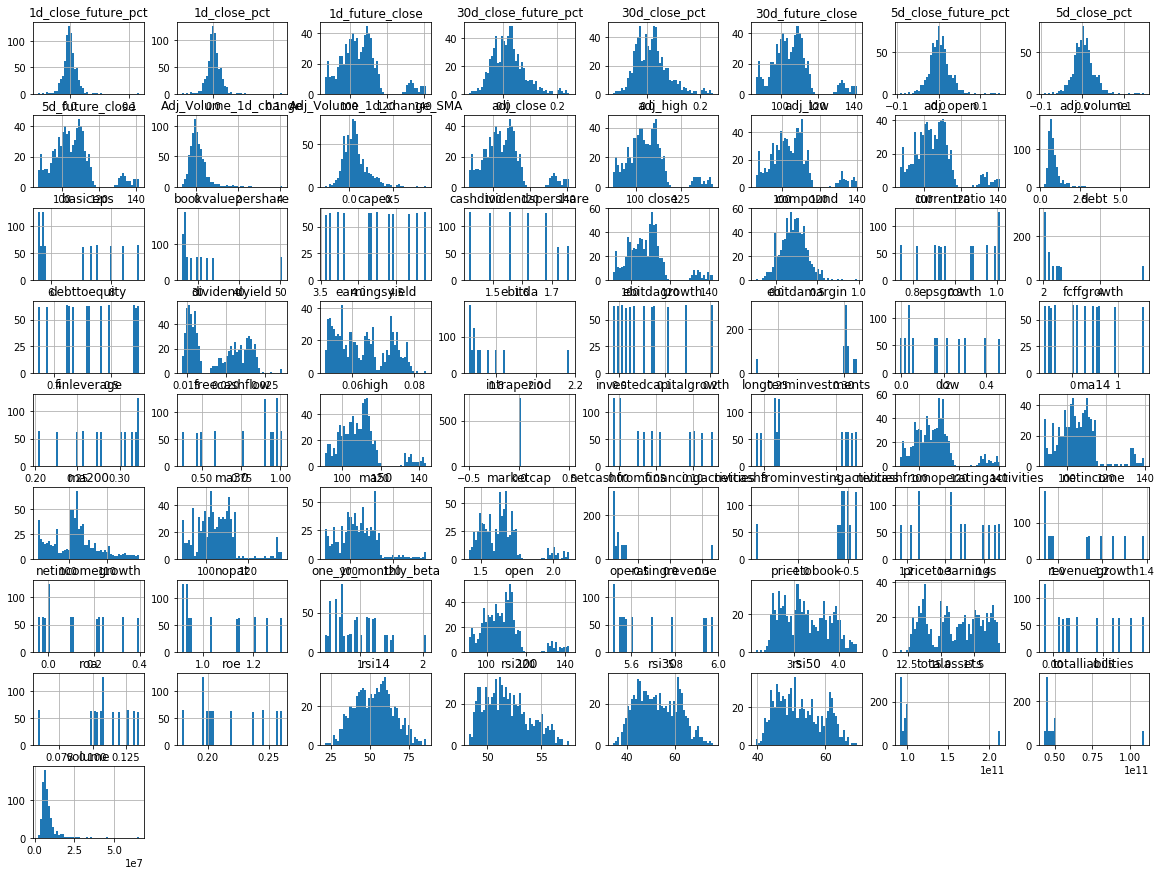

In [170]:
%matplotlib inline
import matplotlib.pyplot as plt
df_price.hist(bins=50, figsize=(20,15))
plt.show()

In [171]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2016-07-01 to 2019-07-01
Data columns (total 68 columns):
adj_close                         754 non-null float64
adj_high                          754 non-null float64
adj_low                           754 non-null float64
adj_open                          754 non-null float64
adj_volume                        754 non-null float64
close                             754 non-null float64
date                              754 non-null datetime64[ns]
frequency                         754 non-null object
high                              754 non-null float64
intraperiod                       754 non-null bool
low                               754 non-null float64
open                              754 non-null float64
volume                            754 non-null float64
ma14                              754 non-null float64
rsi14                             754 non-null float64
ma30                              754 non-null f

In [172]:
df_price.columns

Index(['adj_close', 'adj_high', 'adj_low', 'adj_open', 'adj_volume', 'close',
       'date', 'frequency', 'high', 'intraperiod', 'low', 'open', 'volume',
       'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50', 'rsi50', 'ma200', 'rsi200',
       'compound', 'marketcap', 'pricetobook', 'pricetoearnings',
       'dividendyield', 'earningsyield', 'Quarter', 'nopat', 'freecashflow',
       'roe', 'ebitdagrowth', 'ebitdamargin', 'cashdividendspershare',
       'bookvaluepershare', 'capex', 'currentratio', 'debttoequity',
       'epsgrowth', 'investedcapitalgrowth', 'fcffgrowth', 'finleverage',
       'netincomegrowth', 'roa', 'revenuegrowth', 'basiceps',
       'operatingrevenue', 'ebitda', 'totalassets', 'totalliabilities', 'debt',
       'netincome', 'netcashfromoperatingactivities',
       'netcashfrominvestingactivities', 'netcashfromfinancingactivities',
       'longterminvestments', 'one_yr_monthly_beta', '5d_future_close',
       '5d_close_future_pct', '5d_close_pct', '1d_future_close',
    

In [173]:
# Drop all na values
df_price = df_price.dropna()

# Create features and targets
# use feature_names for features; 5d_close_future_pct for targets
features = df_price[feature_names]
targets = df_price['30d_close_future_pct']

# Create DataFrame from target column and feature columns
feat_targ_df = df_price[['30d_close_future_pct'] + feature_names]

# Calculate correlation matrix
corr = feat_targ_df.corr()
print(corr)

                                30d_close_future_pct  30d_close_pct      ma14  \
30d_close_future_pct                        1.000000       0.049007 -0.150645   
30d_close_pct                               0.049007       1.000000  0.432316   
ma14                                       -0.150645       0.432316  1.000000   
rsi14                                       0.011542       0.821356  0.245021   
ma30                                       -0.182397       0.249928  0.973018   
rsi30                                      -0.055605       0.849606  0.412988   
ma50                                       -0.189015       0.090574  0.919019   
rsi50                                      -0.135665       0.792875  0.513265   
ma200                                       0.058338       0.109077  0.718300   
rsi200                                     -0.298546       0.666210  0.686530   
compound                                   -0.043037       0.027628  0.329767   
marketcap                   

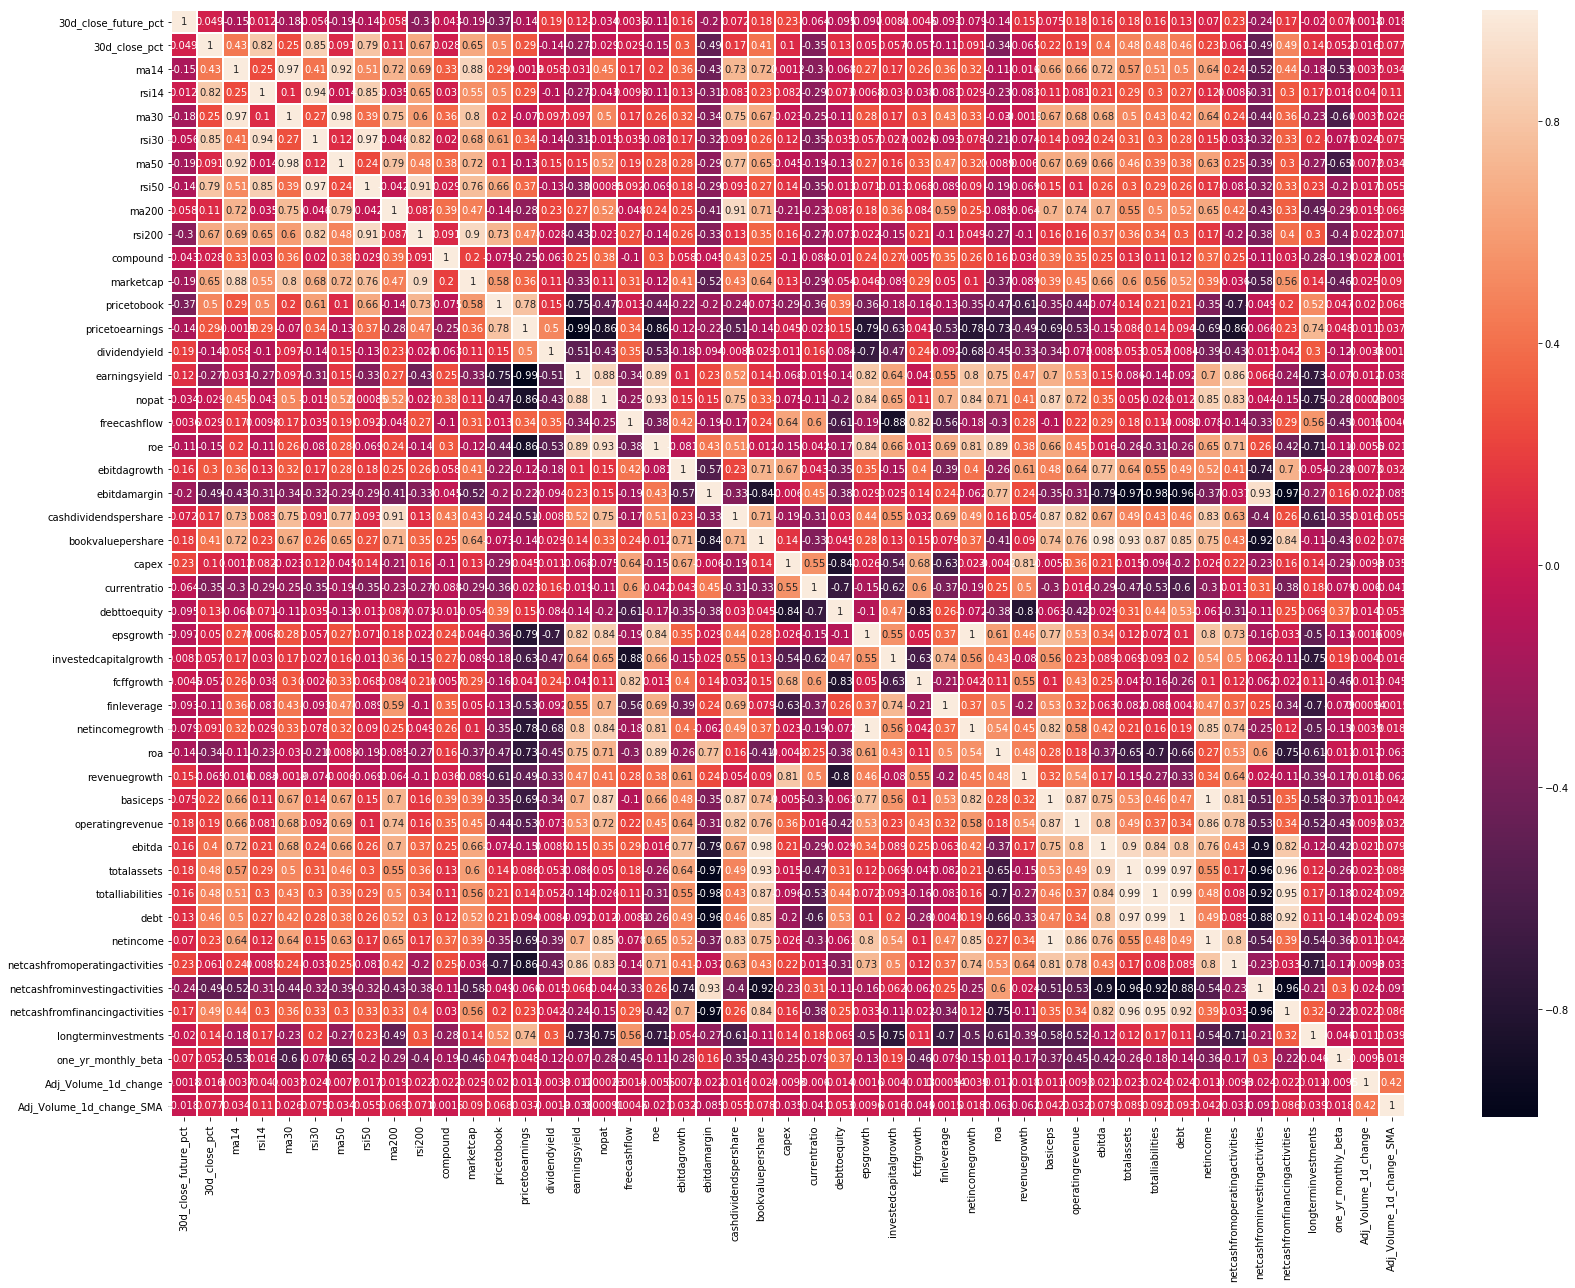

<Figure size 432x288 with 0 Axes>

In [174]:
# Plot heatmap of correlation matrix
plt.figure(figsize=(24, 18))
sns.heatmap(corr, annot=True,linewidths=1)
plt.yticks(rotation=0); plt.xticks(rotation=90)  # fix ticklabel directions
plt.tight_layout()  # fits plot area to the plot, "tightly"
plt.show()  # show the plot
plt.clf()  # clear the plot area

# Create a scatter plot of the most highly correlated variable with the target
#plt.scatter(df_price['ma200'], df_price['5d_close_future_pct'])
#plt.show()

In [175]:
# Calculate the correlation matrix and take the absolute value
corr_matrix = df_price.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.95)
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.90)]

# Drop the features in the to_drop list
reduced_df = df_price.drop(to_drop, axis=1)

print("The reduced_df dataframe has {} columns".format(reduced_df.shape[1]))

The reduced_df dataframe has 39 columns


In [176]:
reduced_df.columns

Index(['date', 'frequency', 'intraperiod', 'volume', 'ma50', 'compound',
       'pricetobook', 'dividendyield', 'earningsyield', 'Quarter',
       'freecashflow', 'roe', 'ebitdagrowth', 'cashdividendspershare', 'capex',
       'currentratio', 'debttoequity', 'investedcapitalgrowth', 'fcffgrowth',
       'finleverage', 'netincomegrowth', 'roa', 'revenuegrowth',
       'operatingrevenue', 'netincome', 'netcashfromoperatingactivities',
       'netcashfromfinancingactivities', 'longterminvestments',
       'one_yr_monthly_beta', '5d_close_future_pct', '5d_close_pct',
       '1d_future_close', '1d_close_future_pct', '1d_close_pct',
       '30d_future_close', '30d_close_future_pct', '30d_close_pct',
       'Adj_Volume_1d_change', 'Adj_Volume_1d_change_SMA'],
      dtype='object')

In [177]:
feature_names=['volume', 'ma14', 'rsi50', 'ma200',
       'rsi200', 'compound',
       'pricetobook', 'dividendyield', 'freecashflow', 'capex',
       'currentratio', 'debttoequity', 'investedcapitalgrowth', 'fcffgrowth',
       'finleverage', 'netincomegrowth', 'roa', 'revenuegrowth',
       'operatingrevenue', 'netincome', 'netcashfromoperatingactivities',
       'netcashfromfinancingactivities', 'longterminvestments',
       'one_yr_monthly_beta',
       '5d_close_pct', 'Adj_Volume_1d_change', 'Adj_Volume_1d_change_SMA']

In [178]:
feature_names = ['compound',
       'marketcap', 'pricetobook', 'dividendyield', 'earningsyield',
       'ebitdamargin', 'cashdividendspershare', 'bookvaluepershare',
       'currentratio', 'debttoequity', 'fcffgrowth', 'finleverage',
       'revenuegrowth', 'operatingrevenue', 'ebitda', 'totalassets', 'debt',
       'netincome', 'netcashfromoperatingactivities',
       'netcashfrominvestingactivities', 'netcashfromfinancingactivities',
       'longterminvestments', 'one_yr_monthly_beta', '5d_close_pct', 'ma14', 'ma30', 'ma50', 'rsi50',
       'ma200', 'rsi200', 'Adj_Volume_1d_change', 'Adj_Volume_1d_change_SMA']

In [179]:
#30 day future return features
feature_names = ['compound',
       'marketcap', 'pricetobook', 'dividendyield', 'earningsyield',
       'ebitdamargin', 'cashdividendspershare', 'bookvaluepershare',
       'currentratio', 'debttoequity', 'fcffgrowth', 'finleverage',
       'revenuegrowth', 'operatingrevenue', 'ebitda', 'totalassets', 'debt',
       'netincome', 'netcashfromoperatingactivities',
       'netcashfrominvestingactivities', 'netcashfromfinancingactivities',
       'longterminvestments', 'one_yr_monthly_beta', '30d_close_pct', 'ma14', 'ma30', 'ma50', 'rsi50',
       'ma200', 'rsi200', 'Adj_Volume_1d_change', 'Adj_Volume_1d_change_SMA']

In [180]:
#feature_names = ['5d_close_pct', 'ma14','ma50', 'rsi50', 'ma200', 'rsi200', 'compound', 'pricetobook', 'pricetoearnings', 'dividendyield', 'earningsyield']
#feature_names = ['compound']
features = df_price[feature_names]
targets = reduced_df['30d_close_future_pct']





In [181]:
targets.describe()

count    694.000000
mean       0.019765
std        0.061567
min       -0.128204
25%       -0.025924
50%        0.016507
75%        0.050247
max        0.247344
Name: 30d_close_future_pct, dtype: float64

In [182]:
# Import the statsmodels library with the alias sm
import statsmodels.api as sm

# Add a constant to the features
linear_features = sm.add_constant(features)

# Create a size for the training set that is 85% of the total number of samples
train_size = int(0.80 * features.shape[0])
train_features = linear_features[:train_size]
train_targets = targets[:train_size]
test_features = linear_features[train_size:len(targets)]
test_targets = targets[train_size:len(targets)]
print(linear_features.shape, train_features.shape, test_features.shape)
print(linear_features.shape, train_features.shape, test_features.shape)

(694, 33) (555, 33) (139, 33)
(694, 33) (555, 33) (139, 33)


In [183]:
train_size

555

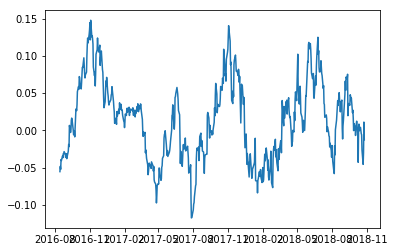

In [184]:
plt.plot(train_targets)

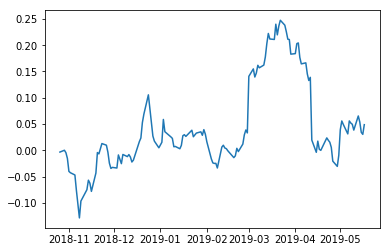

In [185]:
plt.plot(test_targets)

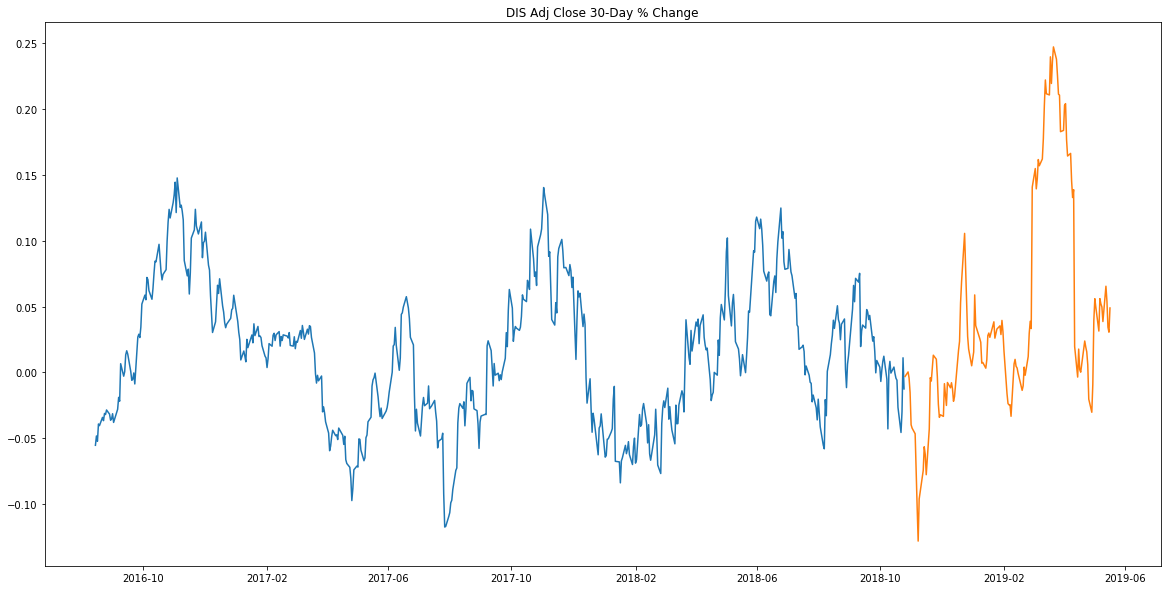

In [186]:
plt.figure(figsize=(20,10))
plt.plot(train_targets)
plt.plot(test_targets)
plt.title('DIS Adj Close 30-Day % Change')
plt.show()

In [187]:
# Create the linear model and complete the least squares fit
model = sm.OLS(train_targets, train_features)
results = model.fit()  # fit the model
print(results.summary())

# examine pvalues
# Features with p <= 0.05 are typically considered significantly different from 0
print(results.pvalues)

# Make predictions from our model for train and test sets
train_predictions = results.predict(train_features)
test_predictions = results.predict(test_features)

                             OLS Regression Results                             
Dep. Variable:     30d_close_future_pct   R-squared:                       0.793
Model:                              OLS   Adj. R-squared:                  0.784
Method:                   Least Squares   F-statistic:                     92.49
Date:                  Sat, 07 Sep 2019   Prob (F-statistic):          9.22e-166
Time:                          10:53:17   Log-Likelihood:                 1282.7
No. Observations:                   555   AIC:                            -2519.
Df Residuals:                       532   BIC:                            -2420.
Df Model:                            22                                         
Covariance Type:              nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

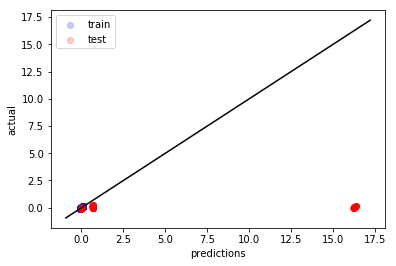

In [188]:
# Scatter the predictions vs the targets with 80% transparency
plt.scatter(train_predictions, train_targets, alpha=0.2, color='b', label='train')
plt.scatter(test_predictions, test_targets, alpha= 0.2, color='r', label='test')

# Plot the perfect prediction line
xmin, xmax = plt.xlim()
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k')

# Set the axis labels and show the plot
plt.xlabel('predictions')
plt.ylabel('actual')
plt.legend()  # show the legend
plt.show()

In [189]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
# scikit-learn:
lr = LinearRegression()
lr.fit(train_features, train_targets)

# Make predictions with our model
train_predictions = lr.predict(train_features)
test_predictions = lr.predict(test_features)

# Create a scatter plot with train and test actual vs predictions
#plt.scatter(train_targets, train_predictions, label='train')
#plt.scatter(test_targets, test_predictions, label='test')
#plt.legend()
#plt.show()

In [190]:
# Look at the R^2 scores on train and test
print(lr.score(train_features, train_targets))
print(lr.score(test_features, test_targets))

0.45374409357282847
-86.75994570318879


In [191]:
print(mean_squared_error(train_targets, train_predictions))
print(mean_squared_error(test_targets, test_predictions))


0.0015170253637684856
0.6239835199325229


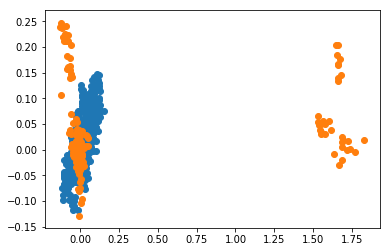

In [192]:
# Scatter the predictions vs actual values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.show()

In [193]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [194]:
scaler = StandardScaler()


scaled_train_features = scaler.fit_transform(train_features)
scaled_test_features = scaler.fit_transform(test_features)

print(linear_features.shape, scaled_train_features.shape, scaled_test_features.shape)
print(linear_features.shape, scaled_train_features.shape, scaled_test_features.shape)

(694, 33) (555, 33) (139, 33)
(694, 33) (555, 33) (139, 33)


In [195]:
scaled_train_features=pd.DataFrame(scaled_train_features,columns=train_features.columns)
scaled_test_features=pd.DataFrame(scaled_test_features,columns=train_features.columns)
print(linear_features.shape, scaled_train_features.shape, scaled_test_features.shape)
print(linear_features.shape, scaled_train_features.shape, scaled_test_features.shape)

(694, 33) (555, 33) (139, 33)
(694, 33) (555, 33) (139, 33)


In [196]:
# Create the linear model and complete the least squares fit
model = sm.OLS(train_targets, train_features)
results = model.fit()  # fit the model
print(results.summary())

# examine pvalues
# Features with p <= 0.05 are typically considered significantly different from 0
print(results.pvalues)

# Make predictions from our model for train and test sets
train_predictions = results.predict(scaled_train_features)
test_predictions = results.predict(scaled_test_features)

                             OLS Regression Results                             
Dep. Variable:     30d_close_future_pct   R-squared:                       0.793
Model:                              OLS   Adj. R-squared:                  0.784
Method:                   Least Squares   F-statistic:                     92.49
Date:                  Sat, 07 Sep 2019   Prob (F-statistic):          9.22e-166
Time:                          10:53:17   Log-Likelihood:                 1282.7
No. Observations:                   555   AIC:                            -2519.
Df Residuals:                       532   BIC:                            -2420.
Df Model:                            22                                         
Covariance Type:              nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [197]:
# scikit-learn:
lr = LinearRegression()
lr.fit(scaled_train_features, train_targets)

# Make predictions with our model
train_predictions = lr.predict(scaled_train_features)
test_predictions = lr.predict(scaled_test_features)

# Create a scatter plot with train and test actual vs predictions
#plt.scatter(train_targets, train_predictions, label='train')
#plt.scatter(test_targets, test_predictions, label='test')
#plt.legend()
#plt.show()b

In [198]:
# Look at the R^2 scores on train and test
print(lr.score(scaled_train_features, train_targets))
print(lr.score(scaled_test_features, test_targets))

0.6176136059645074
-3.12694795840509


In [199]:
print(mean_squared_error(train_targets, train_predictions))
print(mean_squared_error(test_targets, test_predictions))
rsme_train = np.sqrt(mean_squared_error(train_targets, train_predictions))
rsme_test = np.sqrt(mean_squared_error(test_targets, test_predictions))
print('Train Root mean squared error: ' + str(rsme_train))
print('Test Root mean squared error: ' + str(rsme_test))

0.0010619379153370342
0.029343084627391443
Train Root mean squared error: 0.03258738890026377
Test Root mean squared error: 0.17129823299553162


In [200]:
column =['Prediction']
test= pd.DataFrame(test_predictions,columns=column,index=test_targets.index)
#test

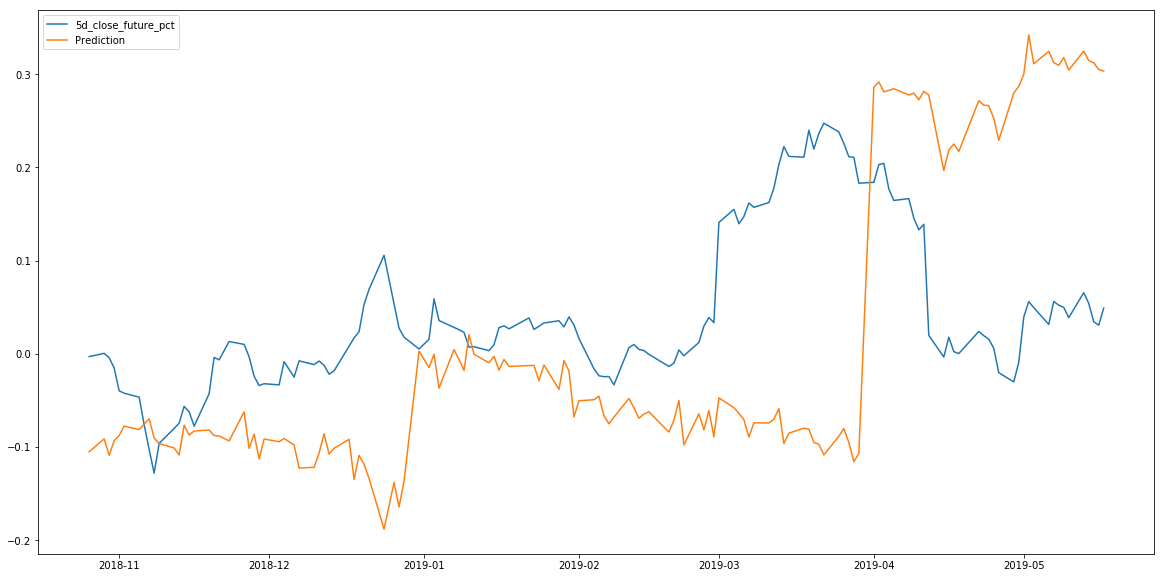

In [201]:
plt.figure(figsize=(20,10))
plt.plot(test_targets)
plt.plot(test)
plt.legend(['5d_close_future_pct','Prediction'])
plt.show()

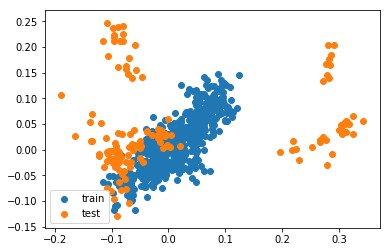

In [202]:
# Scatter the predictions vs actual values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.legend()
plt.show()

### Lasso And Ridge - https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/

In [203]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
scaler = StandardScaler()
# Fit the scaler on the training features and transform these in one go
scaled_train_features = scaler.fit_transform(train_features)

# Create the Lasso model 
la = Lasso()

# Fit it to the standardized training data
la.fit(scaled_train_features, train_targets)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [204]:
# Transform the test set with the pre-fitted scaler
scaled_test_features = scaler.transform(test_features)

# Calculate the coefficient of determination (R squared) on X_test_std
r_squared = la.score(scaled_test_features, test_targets)
print("The model can predict {0:.1%} of the variance in the test set.".format(r_squared))

# Create a list that has True values when coefficients equal 0
zero_coef = la.coef_ == 0

# Calculate how many features have a zero coefficient
n_ignored = sum(zero_coef)
print("The model has ignored {} out of {} features.".format(n_ignored, len(la.coef_)))

The model can predict -12.3% of the variance in the test set.
The model has ignored 33 out of 33 features.


In [205]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.01,normalize=True)

lassoReg.fit(train_features, train_targets)

pred = lassoReg.predict(test_features)
train_pred= lassoReg.predict(train_features)

train_score = r2_score(train_targets, train_pred)
score = r2_score(test_targets, pred)
mse = mean_squared_error(test_targets, test_predictions)

print(train_score)
print(score)
print(mse)
print(np.sqrt(mse))

0.0
-0.12302870619225637
0.029343084627391443
0.17129823299553162


In [206]:
alphas = np.array([20,10,5,4,3,2,1.5,1,0.5,0.1,0.01,0.001,0.0001,0])
test_scores=[]
train_scores=[]

for n in alphas:
    lassoReg = Lasso(alpha=n,normalize=True)
    lassoReg.fit(train_features, train_targets)
    pred = lassoReg.predict(test_features)
    train_pred= lassoReg.predict(train_features)
    train_score = r2_score(train_targets, train_pred)
    train_scores.append(train_score)
    score = r2_score(test_targets, pred)
    test_scores.append(score)


Lasso1=pd.DataFrame(data=test_scores, index=alphas)

Lasso1

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


,0
20.0000,-0.123029
10.0000,-0.123029
5.0000,-0.123029
4.0000,-0.123029
3.0000,-0.123029
2.0000,-0.123029
1.5000,-0.123029
1.0000,-0.123029
0.5000,-0.123029
0.1000,-0.123029


In [207]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
# prepare a range of alpha values to test
alphas = np.array([5,4,3,2,1,0.1,0.01,0.001,0.0001,0])
# create and fit a ridge regression model, testing each alpha
model = Ridge(normalize=True)
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(train_features, train_targets)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([5.e+00, 4.e+00, 3.e+00, 2.e+00, 1.e+00, 1.e-01, 1.e-02, 1.e-03,
       1.e-04, 0.e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
-0.9711096074111939
5.0


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [208]:
from sklearn.linear_model import Ridge
alphas = np.array([20,10,5,4,3,2,1.5,1,0.5,0.1,0.01,0.001,0.0001,0])
test_scores=[]
train_scores=[]

for n in alphas:
    ridgeReg = Ridge(alpha=n, normalize=True)
    ridgeReg.fit(train_features, train_targets)
    pred = ridgeReg.predict(test_features)
    train_pred= ridgeReg.predict(train_features)
    train_score = r2_score(train_targets, train_pred)
    train_scores.append(train_score)
    score = r2_score(test_targets, pred)
    test_scores.append(score)
test_scores

[-0.08376365452379497,
 -0.06412593588441728,
 -0.061645484909313986,
 -0.07062160258592631,
 -0.09368798246994503,
 -0.15718112934207884,
 -0.23490915420152025,
 -0.4234132626871365,
 -1.2417683661294103,
 -15.474204590011851,
 -98.63622904840615,
 -211.1156601375665,
 -423.9986158058592,
 -3.988470447194542e+20]

In [209]:
from sklearn.linear_model import Ridge



ridgeReg = Ridge(alpha=5, normalize=True)

ridgeReg.fit(train_features, train_targets)

pred = ridgeReg.predict(test_features)
train_pred= ridgeReg.predict(train_features)

train_score = r2_score(train_targets, train_pred)
score = r2_score(test_targets, pred)
mse = mean_squared_error(test_targets, test_predictions)

print('Train r2: ' + str(train_score))
print('Test r2: ' + str(score))
#print(mse)
#print(np.sqrt(mse))

Train r2: 0.27337257446971674
Test r2: -0.061645484909313986


In [210]:
from sklearn.linear_model import ElasticNet

ENreg = ElasticNet(alpha=10, l1_ratio=1, normalize=False)

ENreg.fit(train_features,train_targets)

pred_cv = ENreg.predict(test_features)
train_pred= ENreg.predict(train_features)

train_score = r2_score(train_targets, train_pred)
score = r2_score(test_targets, pred)
mse = mean_squared_error(test_targets, test_predictions)

print('Train r2: ' + str(train_score))
print('Test r2: ' + str(score))
#print(mse)
#print(np.sqrt(mse))

Train r2: 0.7542056229271938
Test r2: -0.061645484909313986


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


### PLS - https://www.idtools.com.au/partial-least-squares-regression-python/

In [211]:
#S basic codePython
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define PLS object
pls = PLSRegression(n_components=3,scale=True)

# Fit
pls.fit(train_features, train_targets)

# Prediction
train_predicitions = pls.predict(train_features)
test_predicitions = pls.predict(test_features)

# Calculate scores
train_score = r2_score(train_targets,train_predictions)
score = r2_score(test_targets, test_predictions)
mse = mean_squared_error(test_targets, test_predictions)

print('Train r2: ' + str(train_score))
print('Test r2: ' + str(score))
print(mse)
print(np.sqrt(mse))


Train r2: 0.6176136059645074
Test r2: -3.12694795840509
0.029343084627391443
0.17129823299553162


In [212]:
from sys import stdout
 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
from scipy.signal import savgol_filter
 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, r2_score

In [213]:
X_calib = scaled_train_features
Y_calib = train_targets
X_valid = scaled_test_features
Y_valid = test_targets

def prediction(X_calib, Y_calib, X_valid, Y_valid, plot_components=False):
 
    #Run PLS including a variable number of components, up to 40,  and calculate MSE
    mse = []
    component = np.arange(1, 29)
    for i in component:
        pls = PLSRegression(n_components=i)
        # Fit
        pls.fit(X_calib, Y_calib)
        # Prediction
        Y_pred = pls.predict(X_valid)
 
        mse_p = mean_squared_error(Y_valid, Y_pred)
        mse.append(mse_p)
 
        comp = 100*(i+1)/40
        # Trick to update status on the same line
        stdout.write("\r%d%% completed" % comp)
        stdout.flush()
    stdout.write("\n")
 
    # Calculate and print the position of minimum in MSE
    msemin = np.argmin(mse)
    print("Suggested number of components: ", msemin+1)
    stdout.write("\n")
 
    if plot_components is True:
        with plt.style.context(('ggplot')):
            plt.plot(component, np.array(mse), '-v', color = 'blue', mfc='blue')
            plt.plot(component[msemin], np.array(mse)[msemin], 'P', ms=10, mfc='red')
            plt.xlabel('Number of PLS components')
            plt.ylabel('MSE')
            plt.title('PLS')
            plt.xlim(xmin=-1)
 
        plt.show()
    # Run PLS with suggested number of components
    pls = PLSRegression(n_components=msemin+1)
    pls.fit(train_features, Y_calib)
    Y_pred = pls.predict(X_valid) 
    
    # Calculate and print scores
    score_p = r2_score(Y_valid, Y_pred)
    mse_p = mean_squared_error(Y_valid, Y_pred)
    sep = np.std(Y_pred[:,0]-Y_valid)
    rpd = np.std(Y_valid)/sep
    bias = np.mean(Y_pred[:,0]-Y_valid)
    
    print('R2: %5.3f'  % score_p)
    print('MSE: %5.3f' % mse_p)
    print('SEP: %5.3f' % sep)
    print('RPD: %5.3f' % rpd)
    print('Bias: %5.3f' %  bias)
 
    # Plot regression and figures of merit
    rangey = max(Y_valid) - min(Y_valid)
    rangex = max(Y_pred) - min(Y_pred)
 
    z = np.polyfit(Y_valid, Y_pred, 1)
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))
        ax.scatter(Y_pred, Y_valid, c='red', edgecolors='k')
        ax.plot(z[1]+z[0]*Y_valid, Y_valid, c='blue', linewidth=1)
        ax.plot(Y_valid, Y_valid, color='green', linewidth=1)
        plt.xlabel('Predicted')
        plt.ylabel('Measured')
        plt.title('Prediction')
 
        # Print the scores on the plot
        plt.text(min(Y_pred)+0.05*rangex, max(Y_valid)-0.1*rangey, 'R$^{2}=$ %5.3f'  % score_p)
        plt.text(min(Y_pred)+0.05*rangex, max(Y_valid)-0.15*rangey, 'MSE: %5.3f' % mse_p)
        plt.text(min(Y_pred)+0.05*rangex, max(Y_valid)-0.2*rangey, 'SEP: %5.3f' % sep)
        plt.text(min(Y_pred)+0.05*rangex, max(Y_valid)-0.25*rangey, 'RPD: %5.3f' % rpd)
        plt.text(min(Y_pred)+0.05*rangex, max(Y_valid)-0.3*rangey, 'Bias: %5.3f' %  bias)
        plt.show()

65% completed

/anaconda3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:317: UserWarning: X scores are null at iteration 24
  warnings.warn('X scores are null at iteration %s' % k)
/anaconda3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:317: UserWarning: X scores are null at iteration 24
  warnings.warn('X scores are null at iteration %s' % k)


72% completed
Suggested number of components:  1

R2: -23604.432
MSE: 167.837
SEP: 11.393
RPD: 0.007
Bias: 6.167


/anaconda3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:317: UserWarning: X scores are null at iteration 24
  warnings.warn('X scores are null at iteration %s' % k)
/anaconda3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:317: UserWarning: X scores are null at iteration 24
  warnings.warn('X scores are null at iteration %s' % k)


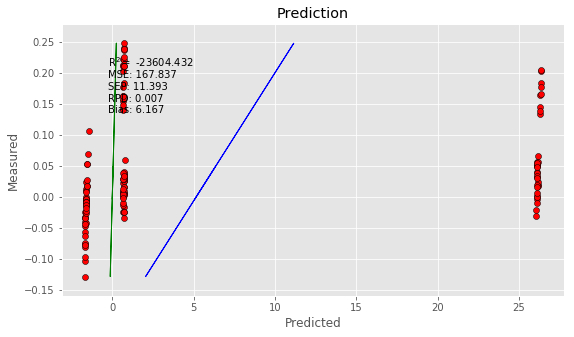

In [214]:
prediction(X_calib, Y_calib, X_valid, Y_valid, plot_components=False)

[33.32 53.37 72.25 79.99 84.46 87.6  90.41 92.83 94.68 96.19 97.57 98.42
 98.97 99.33 99.56 99.73 99.85 99.91 99.94 99.97 99.98 99.99 99.99 99.99
 99.99 99.99 99.99 99.99 99.99 99.99 99.99 99.99 99.99]
0.31143952096093397
0.09871781844116434
0.006408222151863876
0.08005137195491328


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


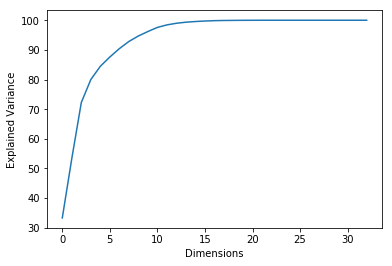

In [215]:
### PCA

import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
%matplotlib inline

#convert it to numpy arrays
X=train_features
X_test=test_features

#Scaling the values
X = scale(X)
X_test=scale(X_test)

pca = PCA(n_components=33)

pca.fit(X)

#The amount of variance that each PC explains
var= pca.explained_variance_ratio_



#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

print(var1)

plt.plot(var1)
plt.xlabel('Dimensions')
plt.ylabel('Explained Variance')

#Looking at above plot I'm taking 30 variables
pca = PCA(n_components=9)
pca.fit(X)
X1=pca.fit_transform(X)
X1_test=pca.fit_transform(X_test)

from sklearn import linear_model
regr = linear_model.LinearRegression() 

y = train_targets
regr.fit(X1,y)
pred=regr.predict(X1)
y_pred=regr.predict(X1_test)


train_score = r2_score(train_targets, pred)
score = r2_score(test_targets, y_pred)
mse = mean_squared_error(test_targets, y_pred)

print(train_score)
print(score)
print(mse)
print(np.sqrt(mse))

### Decision Tree

In [216]:
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree = DecisionTreeRegressor()

# Fit the model to the training features and targets
decision_tree.fit(train_features, train_targets)

# Check the score on train and test
print(decision_tree.score(train_features, train_targets))
print(decision_tree.score(test_features, test_targets))

0.9999974491840969
-0.8163537540649419


In [217]:
#Scaled Data
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree = DecisionTreeRegressor()

# Fit the model to the training features and targets
decision_tree.fit(scaled_train_features, train_targets)

# Check the score on train and test
print(decision_tree.score(scaled_train_features, train_targets))
print(decision_tree.score(scaled_test_features, test_targets))

0.9999974491840969
-0.9399747066890871


In [218]:
for d in [3,5,10]:
    # Create the tree and fit it
    decision_tree = DecisionTreeRegressor(max_depth=d,random_state=42)
    decision_tree.fit(train_features,train_targets)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print(decision_tree.score(train_features, train_targets))
    print(decision_tree.score(test_features, test_targets), '\n')

max_depth= 3
0.7497341485673121
-0.3949177247358584 

max_depth= 5
0.9118788635619168
-0.6306335446480922 

max_depth= 10
0.9962571979610383
-0.6209409507930632 



In [219]:
#Scaled Data
for d in [3,5,10]:
    # Create the tree and fit it
    decision_tree = DecisionTreeRegressor(max_depth=d,random_state=42)
    decision_tree.fit(train_features,train_targets)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print(decision_tree.score(scaled_train_features, train_targets))
    print(decision_tree.score(scaled_test_features, test_targets), '\n')

max_depth= 3
-2.403829960268918
-0.3821945705932426 

max_depth= 5
-3.8389204269237602
-0.8167329560028618 

max_depth= 10
-4.916912638128179
-1.176640648468089 



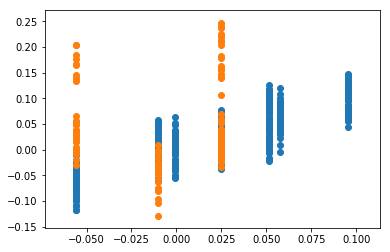

In [220]:
# Use the best max_depth of 3 from last exercise to fit a decision tree
decision_tree = DecisionTreeRegressor(max_depth=3)
decision_tree.fit(train_features, train_targets)

# Predict values for train and test
train_predictions = decision_tree.predict(train_features)
test_predictions = decision_tree.predict(test_features)

# Scatter the predictions vs actual values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.show()

### Random Forest

In [221]:
from sklearn.ensemble import RandomForestRegressor

# Create the random forest model and fit to the training data
rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(train_features, train_targets)

# Look at the R^2 scores on train and test
print(rfr.score(train_features, train_targets))
print(rfr.score(test_features, test_targets))

0.9900947052163197
-0.5733147934977958


Usually, we can use sklearn's GridSearchCV() method to search hyperparameters, but with a financial time series, we don't want to do cross-validation due to data mixing. We want to fit our models on the oldest data and evaluate on the newest data. So we'll use sklearn's ParameterGrid to create combinations of hyperparameters to search.

In [222]:
from sklearn.model_selection import ParameterGrid

# Create a dictionary of hyperparameters to search
grid = {'n_estimators':[200], 'max_depth': [3], 'max_features': [4,8], 'random_state': [42]}
test_scores = []

# Loop through the parameter grid, set the hyperparameters, and save the scores
for g in ParameterGrid(grid):
    rfr.set_params(**g)  # ** is "unpacking" the dictionary
    rfr.fit(train_features, train_targets)
    test_scores.append(rfr.score(test_features, test_targets))

# Find best hyperparameters from the test score and print
best_idx = np.argmax(test_scores)
print(test_scores[best_idx], ParameterGrid(grid)[best_idx])

-0.21313772131095177 {'random_state': 42, 'n_estimators': 200, 'max_features': 4, 'max_depth': 3}


In [223]:
rfr = RandomForestRegressor(n_estimators=200,max_features=4,max_depth=3,random_state=42)
rfr.fit(train_features, train_targets)

# Look at the R^2 scores on train and test
print(rfr.score(train_features, train_targets))
print(rfr.score(test_features, test_targets))

0.7322692700905099
-0.21313772131095177


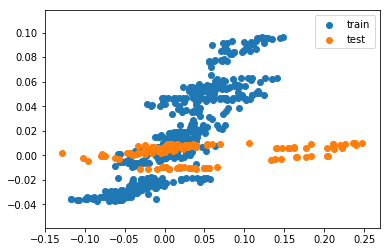

In [224]:
# Use the best hyperparameters from before to fit a random forest model
rfr = RandomForestRegressor(n_estimators=200, max_depth=3, max_features=4, random_state=42)
rfr.fit(train_features, train_targets)

# Make predictions with our model
train_predictions = rfr.predict(train_features)
test_predictions = rfr.predict(test_features)

# Create a scatter plot with train and test actual vs predictions
plt.scatter(train_targets, train_predictions, label='train')
plt.scatter(test_targets, test_predictions, label='test')
plt.legend()
plt.show()

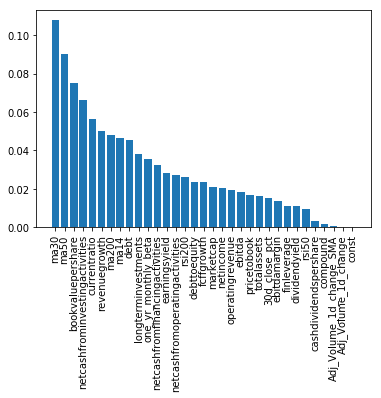

In [225]:
# Get feature importances from our random forest model
importances = rfr.feature_importances_

# Get the index of importances from greatest importance to least
sorted_index = np.argsort(importances)[::-1]
x = range(len(importances))
#x = range(features.shape)
# Create tick labels 
#labels = np.array(feature_names)[sorted_index]
labels = [linear_features.columns[i] for i in sorted_index]
plt.bar(x, importances[sorted_index], tick_label=labels)

# Rotate tick labels to vertical

plt.xticks(rotation=90)
plt.show()

In [226]:
from sklearn.ensemble import GradientBoostingRegressor

# Create GB model -- hyperparameters have already been searched for you
gbr = GradientBoostingRegressor(max_features=3,
                                learning_rate=0.01,
                                n_estimators=200,
                                subsample=0.6,
                                random_state=42)
gbr.fit(train_features,train_targets)

print(gbr.score(train_features, train_targets))
print(gbr.score(test_features,test_targets))

0.7744758102764828
-0.19254870153897752


In [227]:
# Sort feature importances in descending order
#indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
#names = [iris.feature_names[i] for i in indices]

# Create plot
#plt.figure()

# Create plot title
#plt.title("Feature Importance")

# Add bars
#plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
#plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
#plt.show()

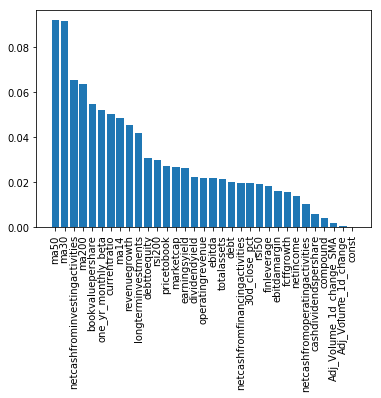

In [228]:
# Extract feature importances from the fitted gradient boosting model
feature_importances = gbr.feature_importances_

# Get the indices of the largest to smallest feature importances
sorted_index = np.argsort(feature_importances)[::-1]
x = range(len(feature_importances))

# Create tick labels 
#labels = np.array(feature_names)[sorted_index]
labels = [linear_features.columns[i] for i in sorted_index]
plt.bar(x, feature_importances[sorted_index], tick_label=labels)

# Set the tick lables to be the feature names, according to the sorted feature_idx
plt.xticks(rotation=90)
plt.show()

### K Nearest Neighbour

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


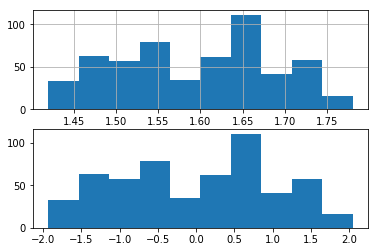

In [229]:


# Standardize the train and test features
scaled_train_features = scale(train_features)
scaled_test_features = scale(test_features)

# Plot histograms of the 14-day SMA RSI before and after scaling
f, ax = plt.subplots(nrows=2, ncols=1)
train_features.iloc[:, 2].hist(ax=ax[0])
ax[1].hist(scaled_train_features[:, 2])
plt.show()

In [230]:
from sklearn.neighbors import KNeighborsRegressor

for n in range(2, 20):
    # Create and fit the KNN model
    knn = KNeighborsRegressor(n_neighbors=n)
    
    # Fit the model to the training data
    knn.fit(scaled_train_features, train_targets)
    
    # Print number of neighbors and the score to find the best value of n
    print("n_neighbors =", n)
    print('train, test scores')
    print(knn.score(scaled_train_features, train_targets))
    print(knn.score(scaled_test_features, test_targets))
    print()  # prints a blank line

n_neighbors = 2
train, test scores
0.9285560707200533
-0.4806485016385518

n_neighbors = 3
train, test scores
0.9053446946091335
-0.462076838439593

n_neighbors = 4
train, test scores
0.8826611208370847
-0.4343515769116548

n_neighbors = 5
train, test scores
0.8674195851327178
-0.43128042888664875

n_neighbors = 6
train, test scores
0.8592340263141233
-0.4428128619170981

n_neighbors = 7
train, test scores
0.8501400943009636
-0.4522839991955485

n_neighbors = 8
train, test scores
0.836928692533069
-0.44068764103817015

n_neighbors = 9
train, test scores
0.831518451860159
-0.45289388736524305

n_neighbors = 10
train, test scores
0.8244147452125056
-0.44648230271736433

n_neighbors = 11
train, test scores
0.8199551926275159
-0.4441218774983564

n_neighbors = 12
train, test scores
0.8159068420803197
-0.44891525399701715

n_neighbors = 13
train, test scores
0.8132210396437691
-0.4440938537710539

n_neighbors = 14
train, test scores
0.8075434809964749
-0.4476558666894228

n_neighbors = 15
t

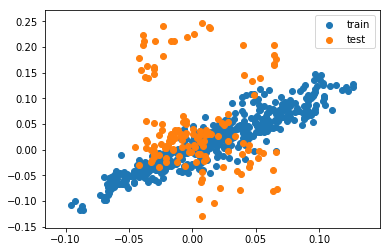

In [231]:
# Create the model with the best-performing n_neighbors of 5
knn = KNeighborsRegressor(n_neighbors=5)

# Fit the model
knn.fit(scaled_train_features, train_targets)

# Get predictions for train and test sets
train_predictions = knn.predict(scaled_train_features)
test_predictions = knn.predict(scaled_test_features)

# Plot the actual vs predicted values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.legend()
plt.show()

### Neural Network 

In [232]:
from keras.models import Sequential
from keras.layers import Dense

# Create the model
model_1 = Sequential()
model_1.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_1.add(Dense(20, activation='relu'))
model_1.add(Dense(1, activation='linear'))

# Fit the model
model_1.compile(optimizer='adam', loss='mse')
history = model_1.fit(scaled_train_features, train_targets, epochs=25)

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Epoch 1/25
555/555 [==============================] - 0s 296us/step - loss: 0.0356
Epoch 2/25
555/555 [==============================] - 0s 21us/step - loss: 0.0069
Epoch 3/25
555/555 [==============================] - 0s 22us/step - loss: 0.0032
Epoch 4/25
555/555 [==============================] - 0s 22us/step - loss: 0.0024
Epoch 5/25
555/555 [==============================] - 0s 23us/step - loss: 0.0019
Epoch 6/25
555/555 [==============================] - 0s 28us/step - loss: 0.0016
Epoch 7/25
555/555 [==============================] - 0s 23us/step - loss: 0.0013
Epoch 8/25
555/555 [==============================] - 0s 24us/step - loss: 0.0012
Epoch 9/25
555/555 [==============================] - 0s 22us/step - loss: 0.0011
Epoch 10/25
555/555 [==============================] - 0s 22us/step - loss: 9.3046e-04
Epoch 11/25
555/555 [==============================] - 0s 23us/step - loss: 8.4624e-04
Epoch 12/25
555/555 [==============================] - 0s 22us/step - loss: 8.4202e-04


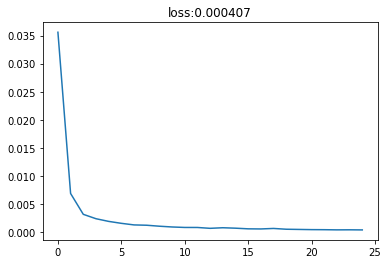

In [233]:
# Plot the losses from the fit
plt.plot(history.history['loss'])

# Use the last loss as the title
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

0.8431918770962854
-6.468463871976642


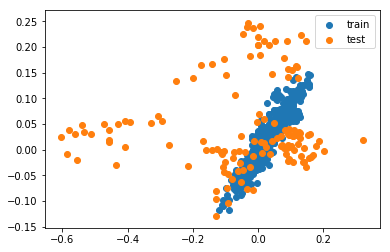

In [261]:
from sklearn.metrics import r2_score

# Calculate R^2 score
train_preds = model_1.predict(scaled_train_features)
test_preds = model_1.predict(scaled_test_features)
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

# Plot predictions vs actual
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds,test_targets, label='test')
plt.legend()
plt.show()

In [262]:
import keras.losses
import tensorflow as tf

# Create loss function
def sign_penalty(y_true, y_pred):
    penalty = 100.
    loss = tf.where(tf.less(y_true * y_pred, 0), \
                     penalty * tf.square(y_true - y_pred), \
                     tf.square(y_true - y_pred))

    return tf.reduce_mean(loss, axis=-1)

keras.losses.sign_penalty = sign_penalty  # enable use of loss with keras
print(keras.losses.sign_penalty)

<function sign_penalty at 0x1c39b1f6a8>


Epoch 1/25
555/555 [==============================] - 0s 769us/step - loss: 5.8155
Epoch 2/25
555/555 [==============================] - 0s 24us/step - loss: 0.5493
Epoch 3/25
555/555 [==============================] - 0s 23us/step - loss: 0.2290
Epoch 4/25
555/555 [==============================] - 0s 26us/step - loss: 0.1559
Epoch 5/25
555/555 [==============================] - 0s 27us/step - loss: 0.1026
Epoch 6/25
555/555 [==============================] - 0s 26us/step - loss: 0.0835
Epoch 7/25
555/555 [==============================] - 0s 24us/step - loss: 0.0600
Epoch 8/25
555/555 [==============================] - 0s 29us/step - loss: 0.0685
Epoch 9/25
555/555 [==============================] - 0s 25us/step - loss: 0.0555
Epoch 10/25
555/555 [==============================] - 0s 25us/step - loss: 0.0436
Epoch 11/25
555/555 [==============================] - 0s 26us/step - loss: 0.0360
Epoch 12/25
555/555 [==============================] - 0s 26us/step - loss: 0.0372
Epoch 13/25


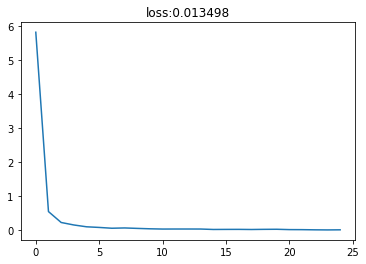

In [263]:
# Create the model
model_2 = Sequential()
model_2.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_2.add(Dense(20, activation='relu'))
model_2.add(Dense(1, activation='linear'))

# Fit the model with our custom 'sign_penalty' loss function
model_2.compile(optimizer='adam', loss=sign_penalty)
history = model_2.fit(scaled_train_features, train_targets, epochs=25)
plt.plot(history.history['loss'])
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

-0.6822882074172523
-7.875046650263437


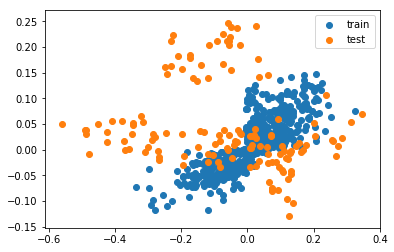

In [264]:
# Evaluate R^2 scores
train_preds = model_2.predict(scaled_train_features)
test_preds = model_2.predict(scaled_test_features)
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

# Scatter the predictions vs actual -- this one is interesting!
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds, test_targets, label= 'test')  # plot test set
plt.legend(); plt.show()

Epoch 1/25
555/555 [==============================] - 0s 600us/step - loss: 0.1883
Epoch 2/25
555/555 [==============================] - 0s 25us/step - loss: 0.0700
Epoch 3/25
555/555 [==============================] - 0s 25us/step - loss: 0.0506
Epoch 4/25
555/555 [==============================] - 0s 31us/step - loss: 0.0367
Epoch 5/25
555/555 [==============================] - 0s 26us/step - loss: 0.0307
Epoch 6/25
555/555 [==============================] - 0s 25us/step - loss: 0.0260
Epoch 7/25
555/555 [==============================] - 0s 28us/step - loss: 0.0221
Epoch 8/25
555/555 [==============================] - 0s 30us/step - loss: 0.0182
Epoch 9/25
555/555 [==============================] - 0s 25us/step - loss: 0.0163
Epoch 10/25
555/555 [==============================] - 0s 28us/step - loss: 0.0160
Epoch 11/25
555/555 [==============================] - 0s 33us/step - loss: 0.0137
Epoch 12/25
555/555 [==============================] - 0s 27us/step - loss: 0.0125
Epoch 13/25


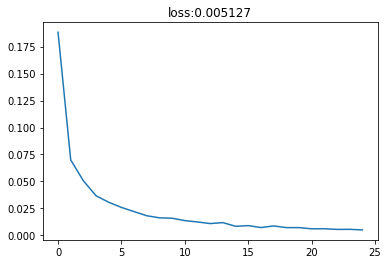

In [265]:
from keras.layers import Dropout

# Create model with dropout
model_3 = Sequential()
model_3.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_3.add(Dropout(0.2))
model_3.add(Dense(20, activation='relu'))
model_3.add(Dense(1, activation='linear'))

# Fit model with mean squared error loss function
model_3.compile(optimizer='adam', loss='mse')
history = model_3.fit(scaled_train_features, train_targets, epochs=25)
plt.plot(history.history['loss'])
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

In [266]:
# Make predictions from the 3 neural net models
train_pred1 = model_1.predict(scaled_train_features)
test_pred1 = model_1.predict(scaled_test_features)

train_pred2 = model_2.predict(scaled_train_features)
test_pred2 = model_2.predict(scaled_test_features)

train_pred3 = model_3.predict(scaled_train_features)
test_pred3 = model_3.predict(scaled_test_features)

# Horizontally stack predictions and take the average across rows
train_preds = np.mean(np.hstack((train_pred1, train_pred2, train_pred3)), axis=1)
test_preds = np.mean(np.hstack((test_pred1,test_pred2, test_pred3)), axis=1)
print(test_preds[-5:])

[-0.18004589 -0.21231772 -0.26532122 -0.2651449  -0.2529637 ]


0.6447894670776477
-2.4936927578954746


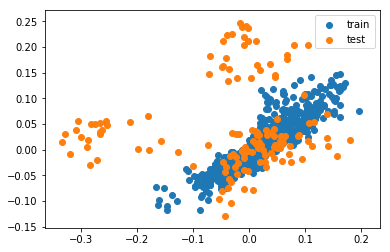

In [267]:
from sklearn.metrics import r2_score

# Evaluate the R^2 scores
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

# Scatter the predictions vs actual -- this one is interesting!
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds, test_targets, label='test')
plt.legend(); plt.show()

### Results Summary DF

In [241]:
Models= ['Linear Regression','Lasso','Ridge','Elastic Net','PLS','PCA','Decision Tree','Random Forest','GBR','KNN','NN1','NN2','NN3']
df_results = pd.DataFrame({"Training":[''], 
                         "Test":['']},index=Models)


In [242]:
Models= ['Linear Regression','Lasso','Ridge','Elastic Net','PLS','PCA','Decision Tree','Random Forest','GBR','KNN','NN1','NN2','NN3']
rmse_results = pd.DataFrame({"Training":[np.sqrt(mean_squared_error(train_targets, train_predictions))], 
          "Test":[np.sqrt(mean_squared_error(test_targets, test_predictions))]},index=Models)


In [243]:
from sklearn.linear_model import LinearRegression
# scikit-learn:
scaler = StandardScaler()

scaled_train_features = scaler.fit_transform(train_features)
scaled_test_features = scaler.fit_transform(test_features)


lr = LinearRegression()
lr.fit(scaled_train_features, train_targets)

# Make predictions with our model
train_predictions = lr.predict(scaled_train_features)
test_predictions = lr.predict(scaled_test_features)



train_score = r2_score(train_targets, train_predictions)
score = r2_score(test_targets, test_predictions)

rmse = np.sqrt(mean_squared_error(test_targets, test_predictions))
train_rmse=np.sqrt(mean_squared_error(train_targets, train_predictions))

df_results.loc['Linear Regression']['Training']=train_score
df_results.loc['Linear Regression']['Test']=score
rmse_results.loc['Linear Regression']['Training']=train_rmse
rmse_results.loc['Linear Regression']['Test']=rmse

In [244]:
from sklearn.linear_model import Lasso
la = Lasso(alpha=0.1)
# Fit it to the standardized training data
la.fit(scaled_train_features, train_targets)
pred = la.predict(scaled_test_features)
train_pred= la.predict(scaled_train_features)

train_score = r2_score(train_targets, train_pred)
score = r2_score(test_targets, pred)
rmse = np.sqrt(mean_squared_error(test_targets, pred))
train_rmse=np.sqrt(mean_squared_error(train_targets, train_pred))

df_results.loc['Lasso']['Training']=train_score
df_results.loc['Lasso']['Test']=score
rmse_results.loc['Lasso']['Training']=train_rmse
rmse_results.loc['Lasso']['Test']=rmse



print(df_results.loc['Lasso'])

Training           0
Test       -0.123029
Name: Lasso, dtype: object


In [245]:
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha=5, normalize=True)

ridgeReg.fit(train_features, train_targets)

pred = ridgeReg.predict(test_features)
train_pred= ridgeReg.predict(train_features)

train_score = r2_score(train_targets, train_pred)
score = r2_score(test_targets, pred)
rmse = np.sqrt(mean_squared_error(test_targets, pred))
train_rmse = np.sqrt(mean_squared_error(train_targets, train_pred))
               
df_results.loc['Ridge']['Training']=train_score
df_results.loc['Ridge']['Test']=score
rmse_results.loc['Ridge']['Training']=train_rmse
rmse_results.loc['Ridge']['Test']=rmse



In [246]:
from sklearn.linear_model import ElasticNet

ENreg = ElasticNet(alpha=1, l1_ratio=1, normalize=True)

ENreg.fit(train_features,train_targets)

test_predictions = ENreg.predict(test_features)
train_predictions= ENreg.predict(train_features)

train_score = r2_score(train_targets, train_predictions)
score = r2_score(test_targets, test_predictions)

rmse = np.sqrt(mean_squared_error(test_targets, test_predictions))
train_rmse=np.sqrt(mean_squared_error(train_targets, train_predictions))
df_results.loc['Elastic Net']['Training']=train_score
df_results.loc['Elastic Net']['Test']=score
rmse_results.loc['Elastic Net']['Training']=train_rmse
rmse_results.loc['Elastic Net']['Test']=rmse

In [247]:
#S basic codePython
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define PLS object
pls = PLSRegression(n_components=1,scale=True)

# Fit
pls.fit(train_features, train_targets)

# Prediction
train_predicitions = pls.predict(train_features)
test_predicitions = pls.predict(test_features)
rmse = np.sqrt(mean_squared_error(test_targets, test_predictions))
train_rmse=np.sqrt(mean_squared_error(train_targets, train_predictions))

df_results.loc['PLS']['Training']=train_score
df_results.loc['PLS']['Test']=score
rmse_results.loc['PLS']['Training']=train_rmse
rmse_results.loc['PLS']['Test']=rmse

In [248]:
from sklearn.decomposition import PCA
X=train_features
X_test=test_features
X = scale(X)
X_test=scale(X_test)

# Reduce dimensions based off variance curve
pca = PCA(n_components=9)
pca.fit(X)
X1=pca.fit_transform(X)
X1_test=pca.fit_transform(X_test)

y = train_targets
lr.fit(X1,y)
pred=lr.predict(X1)
y_pred=lr.predict(X1_test)


train_score = r2_score(train_targets, pred)
score = r2_score(test_targets, y_pred)
rmse = np.sqrt(mean_squared_error(test_targets, y_pred))
train_rmse=np.sqrt(mean_squared_error(train_targets, pred))

df_results.loc['PCA']['Training']=train_score
df_results.loc['PCA']['Test']=score
rmse_results.loc['PCA']['Training']=train_rmse
rmse_results.loc['PCA']['Test']=rmse

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [249]:
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree = DecisionTreeRegressor(max_depth=3,random_state=42)

# Fit the model to the training features and targets
decision_tree.fit(train_features, train_targets)

train_predictions = decision_tree.predict(train_features)
test_predictions = decision_tree.predict(test_features)

train_score = r2_score(train_targets, train_predictions)
score = r2_score(test_targets, test_predictions)
rmse = np.sqrt(mean_squared_error(test_targets, test_predictions))
train_rmse=np.sqrt(mean_squared_error(train_targets, train_predictions))

df_results.loc['Decision Tree']['Training']=train_score
df_results.loc['Decision Tree']['Test']=score
rmse_results.loc['Decision Tree']['Training']=train_rmse
rmse_results.loc['Decision Tree']['Test']=rmse

In [250]:
from sklearn.ensemble import RandomForestRegressor
#Fit model
rfr = RandomForestRegressor(n_estimators=200,max_features=4,max_depth=3,random_state=42)
rfr.fit(train_features, train_targets)

#Predict test data
train_predictions = rfr.predict(train_features)
test_predictions = rfr.predict(test_features)

#Measure performance
train_score = r2_score(train_targets, train_predictions)
score = r2_score(test_targets, test_predictions)
rmse = np.sqrt(mean_squared_error(test_targets, test_predictions))
train_rmse=np.sqrt(mean_squared_error(train_targets, train_predictions))

df_results.loc['Random Forest']['Training']=train_score
df_results.loc['Random Forest']['Test']=score
rmse_results.loc['Random Forest']['Training']=train_rmse
rmse_results.loc['Random Forest']['Test']=rmse

In [251]:
from sklearn.ensemble import GradientBoostingRegressor

# Create GB model -- hyperparameters have already been searched for you
gbr = GradientBoostingRegressor(max_features=3,
                                learning_rate=0.01,
                                n_estimators=200,
                                subsample=0.6,
                                random_state=42)

gbr.fit(train_features,train_targets)

train_score=(gbr.score(train_features, train_targets))
test_score=(gbr.score(test_features,test_targets))

rmse = np.sqrt(mean_squared_error(test_targets, test_predictions))
train_rmse=np.sqrt(mean_squared_error(train_targets, train_predictions))

df_results.loc['GBR']['Training']=train_score
df_results.loc['GBR']['Test']=score
rmse_results.loc['GBR']['Training']=train_rmse
rmse_results.loc['GBR']['Test']=rmse

In [252]:
from sklearn.neighbors import KNeighborsRegressor 

knn = KNeighborsRegressor(n_neighbors=3)
    
# Fit the model to the training data
knn.fit(scaled_train_features, train_targets)

# Get predictions for train and test sets
train_predictions = knn.predict(scaled_train_features)
test_predictions = knn.predict(scaled_test_features)

train_score = r2_score(train_targets, train_predictions)
score = r2_score(test_targets, test_predictions)
rmse = np.sqrt(mean_squared_error(test_targets, test_predictions))
train_rmse=np.sqrt(mean_squared_error(train_targets, train_predictions))

df_results.loc['KNN']['Training']=train_score
df_results.loc['KNN']['Test']=score
rmse_results.loc['KNN']['Training']=train_rmse
rmse_results.loc['KNN']['Test']=rmse
    

In [253]:
from keras.models import Sequential
from keras.layers import Dense

# Create the model
model_1 = Sequential()
model_1.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_1.add(Dense(20, activation='relu'))
model_1.add(Dense(1, activation='linear'))

# Fit the model
model_1.compile(optimizer='adam', loss='mse')
history = model_1.fit(scaled_train_features, train_targets, epochs=25)


train_preds = model_1.predict(scaled_train_features)
test_preds = model_1.predict(scaled_test_features)
rmse = np.sqrt(mean_squared_error(test_targets, test_preds))
train_rmse=np.sqrt(mean_squared_error(train_targets, train_preds))



df_results.loc['NN1']['Train']=(r2_score(train_targets, train_preds))
df_results.loc['NN1']['Test']=(r2_score(test_targets, test_preds))

rmse_results.loc['NN1']['Training']=train_rmse
rmse_results.loc['NN1']['Test']=rmse


Epoch 1/25
555/555 [==============================] - 0s 412us/step - loss: 0.0276
Epoch 2/25
555/555 [==============================] - 0s 24us/step - loss: 0.0064
Epoch 3/25
555/555 [==============================] - 0s 23us/step - loss: 0.0033
Epoch 4/25
555/555 [==============================] - 0s 23us/step - loss: 0.0022
Epoch 5/25
555/555 [==============================] - 0s 31us/step - loss: 0.0020
Epoch 6/25
555/555 [==============================] - 0s 38us/step - loss: 0.0016
Epoch 7/25
555/555 [==============================] - 0s 38us/step - loss: 0.0014
Epoch 8/25
555/555 [==============================] - 0s 29us/step - loss: 0.0013
Epoch 9/25
555/555 [==============================] - 0s 33us/step - loss: 0.0011
Epoch 10/25
555/555 [==============================] - 0s 33us/step - loss: 0.0010
Epoch 11/25
555/555 [==============================] - 0s 30us/step - loss: 9.8393e-04
Epoch 12/25
555/555 [==============================] - 0s 29us/step - loss: 0.0010
Epoch 13

In [254]:
import keras.losses
import tensorflow as tf

# Create loss function
def sign_penalty(y_true, y_pred):
    penalty = 100.
    loss = tf.where(tf.less(y_true * y_pred, 0), \
                     penalty * tf.square(y_true - y_pred), \
                     tf.square(y_true - y_pred))

    return tf.reduce_mean(loss, axis=-1)

keras.losses.sign_penalty = sign_penalty  # enable use of loss with keras
print(keras.losses.sign_penalty)

# Create the model
model_2 = Sequential()
model_2.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_2.add(Dense(20, activation='relu'))
model_2.add(Dense(1, activation='linear'))

# Fit the model with our custom 'sign_penalty' loss function
model_2.compile(optimizer='adam', loss=sign_penalty)
history = model_2.fit(scaled_train_features, train_targets, epochs=25)





train_preds = model_2.predict(scaled_train_features)
test_preds = model_2.predict(scaled_test_features)

rmse = np.sqrt(mean_squared_error(test_targets, test_preds))
train_rmse=np.sqrt(mean_squared_error(train_targets, train_preds))



df_results.loc['NN2']['Train']=(r2_score(train_targets, train_preds))
df_results.loc['NN2']['Test']=(r2_score(test_targets, test_preds))

rmse_results.loc['NN2']['Training']=train_rmse
rmse_results.loc['NN2']['Test']=rmse


<function sign_penalty at 0x1c3a598950>
Epoch 1/25
555/555 [==============================] - 0s 460us/step - loss: 8.3976
Epoch 2/25
555/555 [==============================] - 0s 32us/step - loss: 0.5303
Epoch 3/25
555/555 [==============================] - 0s 27us/step - loss: 0.2284
Epoch 4/25
555/555 [==============================] - 0s 27us/step - loss: 0.1265
Epoch 5/25
555/555 [==============================] - 0s 32us/step - loss: 0.0989
Epoch 6/25
555/555 [==============================] - 0s 27us/step - loss: 0.0822
Epoch 7/25
555/555 [==============================] - 0s 30us/step - loss: 0.0677
Epoch 8/25
555/555 [==============================] - 0s 29us/step - loss: 0.0584
Epoch 9/25
555/555 [==============================] - 0s 31us/step - loss: 0.0566
Epoch 10/25
555/555 [==============================] - 0s 27us/step - loss: 0.0396
Epoch 11/25
555/555 [==============================] - 0s 29us/step - loss: 0.0423
Epoch 12/25
555/555 [==============================] - 

In [255]:
from keras.layers import Dropout
# Create model with dropout
model_3 = Sequential()
model_3.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_3.add(Dropout(0.2))
model_3.add(Dense(20, activation='relu'))
model_3.add(Dense(1, activation='linear'))

# Fit model with mean squared error loss function
model_3.compile(optimizer='adam', loss='mse')
history = model_3.fit(scaled_train_features, train_targets, epochs=25)

train_preds = model_3.predict(scaled_train_features)
test_preds = model_3.predict(scaled_test_features)
rmse = np.sqrt(mean_squared_error(test_targets, test_preds))
train_rmse=np.sqrt(mean_squared_error(train_targets, train_preds))



df_results.loc['NN3']['Train']=(r2_score(train_targets, train_preds))
df_results.loc['NN3']['Test']=(r2_score(test_targets, test_preds))

rmse_results.loc['NN3']['Training']=train_rmse
rmse_results.loc['NN3']['Test']=rmse


Epoch 1/25
555/555 [==============================] - 0s 529us/step - loss: 0.6829
Epoch 2/25
555/555 [==============================] - 0s 28us/step - loss: 0.1458
Epoch 3/25
555/555 [==============================] - 0s 27us/step - loss: 0.0645
Epoch 4/25
555/555 [==============================] - 0s 27us/step - loss: 0.0459
Epoch 5/25
555/555 [==============================] - 0s 31us/step - loss: 0.0425
Epoch 6/25
555/555 [==============================] - 0s 32us/step - loss: 0.0322
Epoch 7/25
555/555 [==============================] - 0s 28us/step - loss: 0.0260
Epoch 8/25
555/555 [==============================] - 0s 28us/step - loss: 0.0251
Epoch 9/25
555/555 [==============================] - 0s 32us/step - loss: 0.0236
Epoch 10/25
555/555 [==============================] - 0s 28us/step - loss: 0.0184
Epoch 11/25
555/555 [==============================] - 0s 26us/step - loss: 0.0174
Epoch 12/25
555/555 [==============================] - 0s 32us/step - loss: 0.0173
Epoch 13/25


In [256]:
df_results.round(3)

,Training,Test
Linear Regression,0.617614,-3.12695
Lasso,0,-0.123029
Ridge,0.273373,-0.0616455
Elastic Net,0,-0.123029
PLS,0,-0.123029
PCA,0.31144,0.0987178
Decision Tree,0.749734,-0.394918
Random Forest,0.732269,-0.213138
GBR,0.774476,-0.213138
KNN,0.905345,-0.462077


Text(0.5,1,'Disney R Squared 30 Day Returns Model Performance')

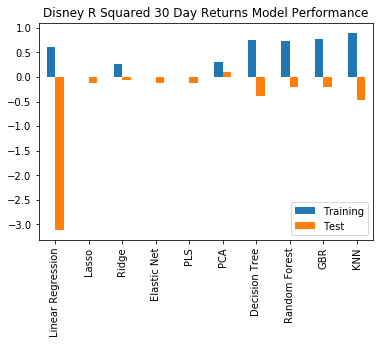

In [257]:

df_results.iloc[:-3:].plot(kind='bar')
plt.title('Disney R Squared 30 Day Returns Model Performance')

In [258]:
rmse_results.round(4)

,Training,Test
Linear Regression,0.0326,0.1713
Lasso,0.0527,0.0894
Ridge,0.0449,0.0869
Elastic Net,0.0527,0.0894
PLS,0.0527,0.0894
PCA,0.0437,0.0801
Decision Tree,0.0264,0.0996
Random Forest,0.0273,0.0929
GBR,0.0273,0.0929
KNN,0.0162,0.1020


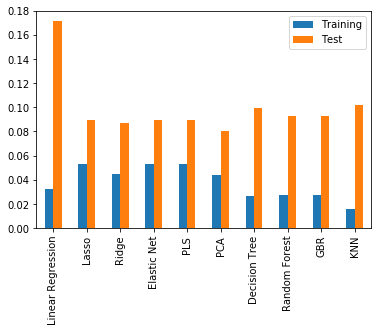

In [259]:
rmse_results.round(4).iloc[:-3:].plot(kind='bar')

In [260]:
test_targets.describe()

count    139.000000
mean       0.043417
std        0.084626
min       -0.128204
25%       -0.007770
50%        0.019683
75%        0.056021
max        0.247344
Name: 30d_close_future_pct, dtype: float64